# Business Analytics with Python: Portfolio - Chess Games
Student Name: Carl Wegener

Study number: 201807109

Flow number: 38

Date: 18/08/2023

## Chess Games Dataset introduction
This portfolio will explore a Lichess dataset of approximately 20.000 chess games available at (https://www.kaggle.com/datasets/datasnaek/chess).
The purpose of this exploration is to examine player styles and opening advantages.

In addition to the dataset from Kaggle, I will import my own games using the Lichess API to supplement the dataset and to give personal flair. 

The portfolio is split into three chapters as listed below:

**1 Descriptive Analytics**

1.1     Preprocessing

1.1.1   Importing the dataset

1.1.2   Incorporating External Data

1.1.3   Handling Missing Values

1.1.4   Renaming variables and creating new ones

1.2     Summary Statistics

1.3     Data Visualization

1.3.1   Simple Plots

1.3.2   Additional Plots

1.3.3   Advanced Plots

1.4     Description of descriptive findings



**2 Predictive Analytics**

2.1     Basic Requirements

2.1.1   Data preprocessing

2.1.2   Model Selection

2.1.3   Model Training

2.1.4   Model Evaluation

2.2     Additional Mastery Tasks

2.2.1   Advanced Feature Engineering

2.2.1.1 CountEncoding

2.2.1.2 CatBoostEncoding

2.2.2   Unsupervised Learning as Feature Input

2.2.2.1 Principal Component Analysis (PCA)

2.2.2.2 Cluster Analysis

2.2.2.3 Both PCA and Clustering features

2.2.3   ModelStacking & Different models

2.2.4   Feature Importance/Diagnostic



**3 Prescriptive Analytics**

3.1     Clustering Through the Warehouse Location Problem (WLP)

3.1.1   Preprocessing

3.1.2   Calculating distances

3.1.3   Formulation of the WLP

3.1.4   Solving the WLP using PuLP & plotting

3.2     Bridging Predictive to Prescriptive Models

3.2.1   Contextual Understanding

3.2.2   Prescriptive Formulation

3.2.3   PuLP Implementation

3.2.3.1 Creating a dictionary of openings

3.2.3.2 Running the Model

3.2.4   Discussion of Prescriptive model


## 1 Descriptive Analytics 
This chapter will explore the summary statistics and create plots of the Lichess dataset and supplemental games.
This is done to get a feel for what the dataset entails and to inspire subsequent analytics.

In [1]:
# Preamble
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import lichess 
import berserk
import chess.pgn
import json

import warnings
warnings.filterwarnings('ignore')

### 1.1 Preprocessing
Firstly, the data must be imported and preprocessed.

#### 1.1.1 Importing the dataset
 Before preprocessing begins, I will examine the variables and datatypes in the dataset.    

In [2]:
chessgames = pd.read_csv("https://raw.githubusercontent.com/Carlweg/SummerSchool_Python_Data/main/games.csv")

chessgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


The dataset mostly contains categorical variables save for the player ratings and number of moves played.

#### 1.1.2 Incorporating External Data
I will now add additional Lichess games played by myself as well as those played by titled chess master players through the Lichess API.
Titled players usernames:

| Real Name              | FIDE title           | Lichess Username: |
|------------------------|----------------------| ----------- |
| Magnus Carlsen         | Grandmaster          | DrNykterstein |
| Yusnel Bacallao Alonso | Grandmaster          | Bacallao2019 |
| Steven Zierk           | Grandmaster          |Zkid |
| Nikita Petrov          | Grandmaster          |pozvonochek |
| Rameshbabu Praggnanandhaa        | Grandmaster          |Praggnanandhaachess |
| Levy Rozman            | International Master |Crew64 |
| Eric Rosen             | International Master |EricRosen |
|Xu Bao | International Master | blue_panda3|
|Junta Ikeda | International Master |datajunkie |
|Dejan Stojanovski |       International Master               |Ucitel |

In [3]:
from datetime import datetime
client = berserk.Client()

end_date = berserk.utils.to_millis(datetime(2023, 8, 16)) # Setting an end date for importing games, since players actively play and could mess up analysis conclusions

titled_players_list = ['drnykterstein', 'bacallao2019', 'zkid','pozvonochek','praggnanandhaachess','crew64','ericrosen','blue_panda3','datajunkie','ucitel']
players_list = ['carlweg'] + titled_players_list

players_game_list = []

for name in players_list:
    x = client.games.export_by_player(username = name,  
                                      max = 500, 
                                      opening = True,
                                      until = end_date,
                                      literate = True)
    players_game_list.append(x)

This creates a list of generators which correspond to each player's games. This is then sorted into its own dataframe.

In [4]:
all_games_list = []

for player in players_game_list:
    for game in player:
        all_games_list.append(game)

In [5]:
df_APIgames = pd.json_normalize(all_games_list)

print('This produces', df_APIgames.shape[0], 'additional chess games extracted through the Lichess API')

This produces 5105 additional chess games extracted through the Lichess API


However, this dataframe contains variables that are not used in the imported csv. 
Below, the variables are removed and renamed to match the imported dataset.

In [6]:
df_APIgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   id                         5105 non-null   object             
 1   rated                      5105 non-null   bool               
 2   variant                    5105 non-null   object             
 3   speed                      5105 non-null   object             
 4   perf                       5105 non-null   object             
 5   createdAt                  5105 non-null   datetime64[ns, UTC]
 6   lastMoveAt                 5105 non-null   datetime64[ns, UTC]
 7   status                     5105 non-null   object             
 8   winner                     4809 non-null   object             
 9   moves                      5105 non-null   object             
 10  players.white.user.name    5082 non-null   object             
 11  play

In [7]:
df_APIgames_c = df_APIgames[['id','rated','speed', 'status', 'winner','moves','players.white.user.id','players.white.rating','players.black.user.id','players.black.rating','opening.eco','opening.name','opening.ply']]  

df_APIgames_c.rename(columns={
    'status' : 'game_outcome',
    'players.white.user.id' : 'white_id',
    'players.black.user.id' : 'black_id',
    'players.white.rating' : 'white_rating',
    'players.black.rating' : 'black_rating',
    'opening.eco' : 'opening_eco',
    'opening.name' : 'opening_name', 
    'opening.ply' : 'opening_moves_number',
    'speed' : 'time_control' 
}, inplace=True)

In [8]:
def count_moves(moves):
    moves_list = moves.split()
    return len(moves_list)

df_APIgames_c['turns'] = df_APIgames_c['moves'].apply(count_moves)

#### 1.1.3 Handling Missing Values
There is still more handling of the datasets that need to be done before the datasets can be combined.
The datasets are checked for potential missing data.

In [9]:
print(df_APIgames_c.isnull().sum())
print(chessgames.isnull().sum())

id                        0
rated                     0
time_control              0
game_outcome              0
winner                  296
moves                     0
white_id                 23
white_rating             23
black_id                 22
black_rating             22
opening_eco             223
opening_name            223
opening_moves_number    223
turns                     0
dtype: int64
id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


Thus, the imported dataset does not contain missing data, but the API accessed data does. 
The missing data here is due to drawn games being denoted as NaN (not a number), and the fact that some of the games were against chess bots (no rating). 
Other missing data will simply be removed.

The unrated chess games (False in the rated variable) will be removed in order to analyse serious games. Games against chess bots are unrated as well.
Removal of missing data should always be motivated in some way, and the motivation for removing these chess games is that chess players don't play to their full ability in unrated games, because a change in their rating is not a risk. These games could bias the results.

In [10]:
df_APIgames_c['winner'] = df_APIgames_c['winner'].fillna('draw')

In [11]:
before_amount = chessgames.shape[0]
chessgames_rated = chessgames[chessgames['rated']]
after_amount = chessgames_rated.shape[0]

print('A total of', before_amount, 'chess games are included in the data.')
print('Of all these games,', before_amount-after_amount, 'chess games were unrated games and are thus removed from the data frame.' )
print('This leaves', after_amount, 'chess games in the data set.')

A total of 20058 chess games are included in the data.
Of all these games, 3903 chess games were unrated games and are thus removed from the data frame.
This leaves 16155 chess games in the data set.


In [12]:
before_amount_API = df_APIgames_c.shape[0]
df_APIgames_cr = df_APIgames_c[df_APIgames_c['rated']]
after_amount_API = df_APIgames_cr.shape[0]

print('A total of', before_amount_API, 'chess games are included in the data.')
print('Of all these games,', before_amount_API - after_amount_API, 'chess games were unrated games and are thus removed from the data frame.' )
print('This leaves', after_amount_API, 'chess games in the data set.')

A total of 5105 chess games are included in the data.
Of all these games, 903 chess games were unrated games and are thus removed from the data frame.
This leaves 4202 chess games in the data set.


Rest of rows with missing values are simply dropped.

In [13]:
df_APIgames_cr = df_APIgames_cr.dropna()

### 1.1.4 Renaming variables and creating new ones
The imported dataset is messy with certain variables that will not be required for analysis. For example the variable victory status is already covered in the 'winner' variable is a more concise form.
Also, some variables are renamed to align with the chess games extracted through the Lichess API

In [14]:
chessgames_rated.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [15]:
chessgames_rc = chessgames_rated[['rated', 'turns',
                                  'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
                                  'black_rating', 'moves', 'opening_name', 'opening_ply', 'opening_eco', 'id']]

chessgames_rc.rename(columns={
    'opening_ply': 'opening_moves_number'
}, inplace=True)

To further differentiate the games, a classification variable that denotes the time control used in the games is added to the dataset. This time control is denoted in the variable 'increment_code' where in 15+15 the first '15' means 15 base minutes per player and '+15' means that 15 seconds are added to a player's time upon making a move as an increment. Increments are not considered in the classifications.
The classifications are as follows:


_Classical Game:_ Longer than 30 minutes

_Rapid Game:_ 10 minutes or longer but less than 30 minutes

_Blitz Game:_ 3 minutes or longer but less than 10 minutes

_Bullet Game:_ 1 minute or longer but less than 3 minutes

_Ultrabullet Game:_ less than 1 minute


In [16]:
def time_function(time_play):
  minutes, _ = time_play.split('+')
  time_minutes = int(minutes)

  if 1 > time_minutes:
      return 'ultraBullet'
  elif 3 > time_minutes:
    return 'bullet'
  elif 3 <= time_minutes < 10:
    return 'blitz'
  elif 10 <= time_minutes < 30:
    return 'rapid'
  else:
    return 'classical'

chessgames_rc["time_control"] = chessgames_rc["increment_code"].apply(time_function)

Now the two datasets have identical variables and can thus be combined.

In [17]:
all_chess_games = pd.concat([chessgames_rc, df_APIgames_cr])

However, there is a chance that there are duplicates of games, which should be accounted for.

In [18]:
all_chess_games['id'].value_counts()

id
XRuQPSzH    5
h0YsGMhj    4
t7vvcwqO    4
igSDFKv0    4
facMwkUo    4
           ..
Bz1tOQr0    1
ahCgcKhg    1
75cStmD5    1
57tBRmVS    1
J4zgWWJD    1
Name: count, Length: 19586, dtype: int64

In [19]:
all_chess_games_cc = all_chess_games.drop_duplicates(subset='id', keep = 'first')

print(all_chess_games.shape[0] - all_chess_games_cc.shape[0], 'games were duplicate games and were thus removed')

688 games were duplicate games and were thus removed


In lieu of only analyzing 'serious' rated games, games with under 10 turns are also removed.

In [20]:
all_chess_games_c = all_chess_games_cc[(all_chess_games_cc['turns'] > 9.5)]

print(all_chess_games_cc.shape[0] - all_chess_games_c.shape[0], 'games were not \'serious\' games and were thus removed')

410 games were not 'serious' games and were thus removed


After many removed games, the dataframe is ready to be worked on.

I want to compare my own games with the rest of the database. Thus, I create a variable that returns True if I participated in the game.
Likewise, games with one of the titled players participating are given a variable. 

In [21]:
all_chess_games_c['carl_game'] = (all_chess_games_c['white_id'] == 'carlweg') | (all_chess_games_c['black_id'] == 'carlweg')

all_chess_games_c['titled_player_game'] = (all_chess_games_c['white_id'].isin(titled_players_list)) | (all_chess_games_c['black_id'].isin(titled_players_list))

A variable that could be interesting to include is the difference between the players' ratings. In chess a rating difference of 100 and above between players is usually regarded as a significant difference. 
Thus a variable that takes the differences between the ratings is defined in the dataset. 

In [22]:
all_chess_games_c["rating_difference"] = all_chess_games_c['white_rating'] - all_chess_games_c['black_rating']

Hence, a positive value in the rating_difference variable means that white is higher rated, while a negative value means that black is higher rated. 
Alternatively one could denote the difference in absolute values to find the difference in relative terms. However, which way the difference is favored as it can provide insight in the analysis.

In [23]:
all_chess_games_c["rating_difference_abs"] = abs(all_chess_games_c['white_rating'] - all_chess_games_c['black_rating'])
all_chess_games_c["rating_mean"] = (all_chess_games_c['white_rating'] + all_chess_games_c['black_rating']) / 2

The 'opening_eco' variable possesses very high cardinality with many different openings. This can cause issue later on in terms of computation times and might be troublesome to draw conclusions from.
However, the opening is a core aspect of chess, so it is important to distinguish between the openings. 

In [24]:
all_chess_games_c['opening_eco'].unique().shape

(406,)

However, there are some main codes that the opening codes can be categorized to, as described by in https://en.wikipedia.org/wiki/Encyclopaedia_of_Chess_Openings#Main_ECO_codes
This allows 14 different categories of openings. I will categorize each game according to the categorization below:
**A**
White first moves other than 1.e4, 1.d4 (A00–A39)
1.d4 without 1...d5, 1...Nf6 or 1...f5: Atypical replies to 1.d4 (A40–A44)
1.d4 Nf6 without 2.c4: Atypical replies to 1...Nf6 (A45–A49)
1.d4 Nf6 2.c4 without 2...e6, 2...g6: Atypical Indian systems (A50–A79)
1.d4 f5: Dutch Defence (A80–A99)
**B**
1.e4 without 1...c6, 1...c5, 1...e6, 1...e5 (B00–B09)
1.e4 c6: Caro–Kann Defence (B10–B19)
1.e4 c5: Sicilian Defence (B20–B99)
**C**
1.e4 e6: French Defence (C00–C19)
1.e4 e5: Double King Pawn games (C20–C99)
**D**
1.d4 d5: Double Queen Pawn games (D00–D69)
1.d4 Nf6 2.c4 g6 with 3...d5: Grünfeld Defence (D70–D99)
**E**
1.d4 Nf6 2.c4 e6: Indian systems with ...e6 (E00–E59)
1.d4 Nf6 2.c4 g6 without 3...d5: Indian systems with ...g6 (except Grünfeld) (E60–E99)

In [25]:
def category_eco(eco):
    if 'A' <= eco[0] <= 'A' and '00' <= eco[1:] <= '39':
        return 'A00–A39'
    elif 'A' <= eco[0] <= 'A' and '40' <= eco[1:] <= '44':
        return 'A40–A44'
    elif 'A' <= eco[0] <= 'A' and '45' <= eco[1:] <= '49':
        return 'A45–A49'
    elif 'A' <= eco[0] <= 'A' and '50' <= eco[1:] <= '79':
        return 'A50-A79'
    elif 'A' <= eco[0] <= 'A' and '80' <= eco[1:] <= '99':
        return 'A80–A99'
    
    elif 'B' <= eco[0] <= 'B' and '00' <= eco[1:] <= '09':
        return 'B00-B09'
    elif 'B' <= eco[0] <= 'B' and '10' <= eco[1:] <= '19':
        return 'B10-B19'
    elif 'B' <= eco[0] <= 'B' and '20' <= eco[1:] <= '99':
        return 'B20-B99'
    
    elif 'C' <= eco[0] <= 'C' and '00' <= eco[1:] <= '19':
        return 'C00-C19'
    elif 'C' <= eco[0] <= 'C' and '20' <= eco[1:] <= '99':
        return 'C20-C99'
    
    elif 'D' <= eco[0] <= 'D' and '00' <= eco[1:] <= '69':
        return 'D00-D69'
    elif 'D' <= eco[0] <= 'D' and '70' <= eco[1:] <= '99':
        return 'D70-D99'
    
    elif 'E' <= eco[0] <= 'E' and '00' <= eco[1:] <= '59':
        return 'E00-E59'
    elif 'E' <= eco[0] <= 'E' and '60' <= eco[1:] <= '99':
        return 'E60-E99'
    
    else:
        return NULL
    
all_chess_games_c['eco_category'] = all_chess_games_c['opening_eco'].apply(category_eco)
all_chess_games_c['eco_category'].isnull().sum()

0

There is now a categorical variable that can take 14 different values.

To avoid issues with indexes later on, I reset them.

In [26]:
all_chess_games_c = all_chess_games_c.reset_index()

### 1.2 Summary Statistics

To get a feel for what the data contains, the data is described below. However, only variables that include floats and integers are described.

In [27]:
all_chess_games_c.describe()

,index,turns,white_rating,black_rating,opening_moves_number,rating_difference,rating_difference_abs,rating_mean
count,19176.000000,19176.000000,19176.000000,19176.000000,19176.000000,19176.000000,19176.000000,19176.000000
mean,8381.838131,67.523363,1839.524823,1837.914946,4.949781,1.609877,158.319723,1838.719884
std,5981.646693,34.023585,545.096811,548.499143,2.947101,228.146161,164.276660,534.769346
min,0.000000,10.000000,726.000000,746.000000,1.000000,-2491.000000,0.000000,780.000000
25%,3111.000000,43.000000,1459.000000,1453.000000,3.000000,-107.000000,45.000000,1460.000000
50%,7186.500000,61.000000,1688.000000,1683.000000,4.000000,2.000000,110.000000,1676.000000
75%,13698.250000,87.000000,2057.000000,2065.000000,6.000000,112.000000,211.000000,2046.500000
max,20057.000000,349.000000,3367.000000,3366.000000,28.000000,1906.000000,2491.000000,3311.000000


In [28]:
print('There are', all_chess_games_c.shape[0], 'games in the dataset, of which', all_chess_games_c[(all_chess_games_c['titled_player_game'] == True)].shape[0], 'are games played by titled players and', all_chess_games_c[(all_chess_games_c['carl_game'] == True)].shape[0], 'are games played by me.')
print('After preprocessing and adding variables, there are a total of', all_chess_games_c.shape[1], 'variables in the dataset')
print('----------------------')
print('The average number of turns played in the', all_chess_games_c.shape[0], 'games was', round(all_chess_games_c['turns'].mean()), '. There was even a game with', round(all_chess_games_c['turns'].max()), 'turns.')
print('The ratings of the players ranged from', round(min(all_chess_games_c[['white_rating','black_rating']].values.min(axis=1))), 'to', round(max(all_chess_games_c[['white_rating','black_rating']].values.max(axis=1))))
print('The game with the biggest difference in ratings between both players is', round(all_chess_games_c['rating_difference_abs'].max()))
print('The mean rating of all players is', round(all_chess_games_c['rating_mean'].max()))


There are 19176 games in the dataset, of which 4018 are games played by titled players and 94 are games played by me.
After preprocessing and adding variables, there are a total of 22 variables in the dataset
----------------------
The average number of turns played in the 19176 games was 68 . There was even a game with 349 turns.
The ratings of the players ranged from 726 to 3367
The game with the biggest difference in ratings between both players is 2491
The mean rating of all players is 3311


In [29]:
all_chess_games_c[(all_chess_games_c['titled_player_game'] == True)].shape[0]

4018

Below I explore the most popular openings in the dataset. 

In [30]:
all_chess_games_c['opening_eco'].value_counts()

opening_eco
A00    896
C00    722
D00    627
A40    622
B01    607
      ... 
C85      1
A96      1
D63      1
B55      1
D71      1
Name: count, Length: 406, dtype: int64

A00 is the most popular opening ECO followed by C00. A00 corresponds to a uncommon or irregular opening, which usually means its a bad opener according to experts. 
C00 is the French Defense.
On the bottom of the list, there are many different variations of openings that have their own ECO notation.

In [31]:
all_chess_games_c['eco_category'].value_counts()

eco_category
C20-C99    4924
A00–A39    2922
B20-B99    2474
D00-D69    2432
B00-B09    1884
C00-C19    1413
A40–A44     855
A45–A49     650
B10-B19     562
E00-E59     361
E60-E99     276
A50-A79     193
A80–A99     133
D70-D99      97
Name: count, dtype: int64

C20-C99 is the most used opening category, which are double king pawn games, while D70-D99 is the least popular, being the Grünfeld Defense.

In [32]:
all_chess_games_c[['time_control']].value_counts()

time_control
rapid           11408
blitz            4270
bullet           2472
classical         765
ultraBullet       261
Name: count, dtype: int64

Rapid is by far the most popular time format. This is most likely attributed to the fact that online chess players want a quick experience, but still want to have sufficient time to think between moves.
Blitz can be played with up to just under 10 minutes, which also gives quite a bit of time to think between moves. 
The quick experience aspect is lost when played classical time format, which requires both players to play for perhaps an hour or more, hence classical's popularity spot makes sense.
Ultrabullet is the most unpopular category, which makes sense in that it requires very quick thinking.

To delve deeper, I will explore the openings employed in the different games across different time formats. 
Specifically I will look at the mean ratings of the players using each ECO category across each time format. The first table will be the shortest time format, ultrabullet, and will ascend in time format in subsequent tables. The tables can appear messy, however I will summarize them in a plot in section _1.3.2 Additional Plots_ in this chapter.

In [33]:
ultrabullet_stats = all_chess_games_c[all_chess_games_c['time_control'] == 'ultraBullet'].groupby('eco_category')['rating_mean'].describe()
ultrabullet_stats_overall = all_chess_games_c[all_chess_games_c['time_control'] == 'ultraBullet']['rating_mean'].describe()
ultrabullet_stats.loc['Overall'] = ultrabullet_stats_overall

ultrabullet_stats

,count,mean,std,min,25%,50%,75%,max
eco_category,,,,,,,,
A00–A39,179.0,2260.779330,225.817859,989.5,2074.000,2327.00,2451.500,2503.5
A40–A44,33.0,2219.969697,179.451201,1937.5,2063.500,2326.50,2327.000,2503.5
A45–A49,8.0,2103.312500,146.763643,1953.5,2063.500,2073.25,2073.875,2452.0
A50-A79,1.0,2011.500000,NaN,2011.5,2011.500,2011.50,2011.500,2011.5
B00-B09,16.0,1998.843750,403.500918,977.5,2052.375,2073.75,2208.375,2452.5
B20-B99,2.0,2036.000000,202.232539,1893.0,1964.500,2036.00,2107.500,2179.0
C00-C19,4.0,2232.000000,208.235444,1974.0,2107.500,2276.50,2401.000,2401.0
C20-C99,9.0,1799.222222,291.324680,1494.0,1543.500,1688.50,2062.000,2193.5
D00-D69,5.0,1867.900000,279.077588,1508.0,1623.000,2062.00,2070.000,2076.5


ECO category A00-A39 is by far the most popular opening category in ultrabullet. A possible reason to this is the unstructured nature of some of the openings in this category. 
The sample of ultrabullet games is so tiny and mostly centered around ECO category A00-A39 that it's difficult to draw any conclusions on player style and openings from.
Also, obvious from the overall 25% percentile is that players in this time format tend to be higher rated. 
However, the speed of the games most likely causes a natural ceiling even for grandmaster players, wherein moves have to be made so quick that one player can get lucky in making a good move.

In [34]:
bullet_stats = all_chess_games_c[all_chess_games_c['time_control'] == 'bullet'].groupby('eco_category')['rating_mean'].describe()
bullet_stats_overall = all_chess_games_c[all_chess_games_c['time_control'] == 'bullet']['rating_mean'].describe()
bullet_stats.loc['Overall'] = bullet_stats_overall

bullet_stats

,count,mean,std,min,25%,50%,75%,max
eco_category,,,,,,,,
A00–A39,757.0,2804.511889,295.413706,809.0,2774.000,2885.00,2945.000,3311.0
A40–A44,175.0,2698.377143,364.337815,1210.5,2470.250,2821.50,2894.250,3258.0
A45–A49,200.0,2848.722500,224.713149,1603.5,2807.000,2865.50,2926.250,3259.0
A50-A79,27.0,2812.777778,191.868010,2278.0,2778.500,2851.50,2896.000,3189.0
A80–A99,13.0,2831.230769,195.310396,2460.5,2788.000,2865.00,2920.000,3260.0
B00-B09,270.0,2941.629630,296.308069,892.5,2859.750,2976.50,3147.000,3310.5
B10-B19,71.0,2859.845070,298.551642,1258.5,2830.750,2920.00,2995.750,3186.0
B20-B99,208.0,2937.399038,240.716773,1520.0,2869.875,2926.00,3043.625,3311.0
C00-C19,162.0,2764.870370,337.815284,1171.0,2811.375,2888.75,2926.375,3190.0


Players in the bullet time format are even higher rated that those in ultrabullet judging by the 25% percentile. However, like in ultrabullet, the ECO category A00-A39 is the most occurring opening.
The higher rated players tend to use ECO categories D70-D99, E00-E59 and B00-B09 judging by the means. These openings are Grünfeld defence (1. d4 Nf6 2. c4 g6), Indian systems and various e4 openings respectively. 
As previously seen, the Grünfeld defense was the least popular category among all categories, which suggests that a sole titled player might favor this opening.
Judging by the high ratings, it is likely that the titled players play blitz quite a bit. Their opening repertoire is highly sophisticated, hence they might tend to use more uncommon openings to catch their opponents off guard.

In [35]:
blitz_stats = all_chess_games_c[all_chess_games_c['time_control'] == 'blitz'].groupby('eco_category')['rating_mean'].describe()
blitz_stats_overall = all_chess_games_c[all_chess_games_c['time_control'] == 'blitz']['rating_mean'].describe()
blitz_stats.loc['Overall'] = blitz_stats_overall

blitz_stats

,count,mean,std,min,25%,50%,75%,max
eco_category,,,,,,,,
A00–A39,675.0,1951.300000,568.344826,1052.0,1460.750,1737.00,2578.250,3070.5
A40–A44,202.0,1741.247525,434.096907,1023.5,1438.125,1632.25,1910.375,2875.0
A45–A49,208.0,2289.069712,484.699400,1064.5,1889.750,2446.25,2678.125,2962.5
A50-A79,71.0,2396.084507,418.581473,1232.5,2293.500,2589.00,2693.500,2923.0
A80–A99,41.0,2086.073171,494.725562,1300.0,1736.500,1906.00,2620.000,2857.0
B00-B09,400.0,1769.551250,466.640319,912.5,1438.750,1614.00,2017.750,3062.5
B10-B19,139.0,1842.140288,488.647297,1110.0,1469.500,1659.00,2300.000,3140.0
B20-B99,551.0,2081.176951,499.439140,998.0,1612.750,1982.00,2632.000,3000.5
C00-C19,283.0,1733.941696,416.994810,1007.5,1446.250,1618.50,1941.500,2826.0


In blitz, the overall player rating is significantly lower than that of bullet and ultrabullet. ECO category C20-C99 is the most occurring opening, being Double King Pawn games.
Higher rated players in blitz tend to favor D70-D99 (Grünfeld defences) - there are however, few of such openings occurring in the dataset. 

In [36]:
rapid_stats = all_chess_games_c[all_chess_games_c['time_control'] == 'rapid'].groupby('eco_category')['rating_mean'].describe()
rapid_stats_overall = all_chess_games_c[all_chess_games_c['time_control'] == 'rapid']['rating_mean'].describe()
rapid_stats.loc['Overall'] = rapid_stats_overall

rapid_stats

,count,mean,std,min,25%,50%,75%,max
eco_category,,,,,,,,
A00–A39,1218.0,1587.809524,281.220065,890.5,1387.000,1566.25,1800.500,2640.5
A40–A44,424.0,1593.495283,253.156963,953.0,1431.375,1587.00,1772.625,2370.5
A45–A49,220.0,1727.306818,265.675529,947.0,1553.000,1725.75,1924.250,2700.5
A50-A79,88.0,1777.079545,252.274354,995.0,1626.500,1772.75,1945.500,2610.5
A80–A99,79.0,1791.158228,236.441861,1283.5,1616.250,1815.50,1936.250,2333.0
B00-B09,1108.0,1549.703971,274.120964,951.5,1352.375,1524.50,1730.750,2448.0
B10-B19,337.0,1661.298220,253.251800,1038.0,1491.500,1653.50,1832.500,2414.5
B20-B99,1608.0,1681.877488,263.156678,957.0,1493.500,1666.75,1860.250,2686.5
C00-C19,916.0,1630.044760,259.742282,967.5,1447.250,1640.50,1815.125,2361.5


Rapid is the most popular time format in the dataset. C20-C99 openings are the most occurring, and are employed across all skill levels. Overall, lower rated players play more rapid. Most likely attributed to the time to think preference. 

In [37]:
classical_stats = all_chess_games_c[all_chess_games_c['time_control'] == 'classical'].groupby('eco_category')['rating_mean'].describe()
classical_stats_overall = all_chess_games_c[all_chess_games_c['time_control'] == 'classical']['rating_mean'].describe()
classical_stats.loc['Overall'] = classical_stats_overall

classical_stats

,count,mean,std,min,25%,50%,75%,max
eco_category,,,,,,,,
A00–A39,93.0,1559.715054,292.117591,1123.5,1321.000,1495.50,1747.000,2250.0
A40–A44,21.0,1553.190476,257.214282,1115.0,1435.000,1536.50,1797.000,1959.5
A45–A49,14.0,1780.500000,247.663388,1457.5,1604.125,1734.75,1968.750,2195.5
A50-A79,6.0,1861.500000,227.859167,1569.0,1668.000,1977.75,2014.875,2052.5
B00-B09,90.0,1510.377778,281.744987,1029.5,1289.250,1463.00,1701.250,2199.0
B10-B19,15.0,1739.933333,269.979091,1290.5,1567.250,1647.00,1963.250,2160.5
B20-B99,105.0,1683.095238,262.983822,1195.0,1534.000,1646.00,1859.500,2320.5
C00-C19,48.0,1560.677083,275.806506,1017.5,1382.625,1535.50,1728.500,2183.0
C20-C99,259.0,1546.505792,255.001875,916.5,1368.250,1525.50,1676.750,2268.5


The lowest skill levels on average play classical time format. The quicker nature is more appealing to online players, wherein the classical time format requires more time to gain rating as games take longer.
C20-C99 openings are also the most occurring in this time format.

### 1.3 Data Visualization
While the tables previously shown can be useful in grasping the dataset, it is useful to plot data to easier understand relationships between datapoints.

#### 1.3.1 Simple Plots
To capture the proportion of games played by non-titled and titled player games in different time formats, openings played as well as the game outcome, I capture all these features in a dictionary.

In [38]:
winners_title_false_prop = all_chess_games_c[~all_chess_games_c['titled_player_game']]['winner'].value_counts(normalize=True)
winners_title_true_prop = all_chess_games_c[all_chess_games_c['titled_player_game']]['winner'].value_counts(normalize=True)

timecont_title_false_prop = all_chess_games_c[~all_chess_games_c['titled_player_game']]['time_control'].value_counts(normalize=True)
timecont_title_true_prop = all_chess_games_c[all_chess_games_c['titled_player_game']]['time_control'].value_counts(normalize=True)

ecocat_title_false_prop = all_chess_games_c[~all_chess_games_c['titled_player_game']]['eco_category'].value_counts(normalize=True)
ecocat_title_true_prop = all_chess_games_c[all_chess_games_c['titled_player_game']]['eco_category'].value_counts(normalize=True)

In [39]:
categories_prop = ['winner', 'time_control', 'eco_category']
prop_df_dict = {}

for category in categories_prop:
    title_false_prop = all_chess_games_c[~all_chess_games_c['titled_player_game']][category].value_counts(normalize=True)
    title_true_prop = all_chess_games_c[all_chess_games_c['titled_player_game']][category].value_counts(normalize=True)
    
    data = {
        'Non-titled player games': title_false_prop,
        'Titled player games': title_true_prop
    }
    
    prop_df_dict[category] = pd.DataFrame(data)

I now have a dictionary of dataframes which has the proportion of games for both non-titled and titled player games across 3 different variables. These are plotted below in bar plots.

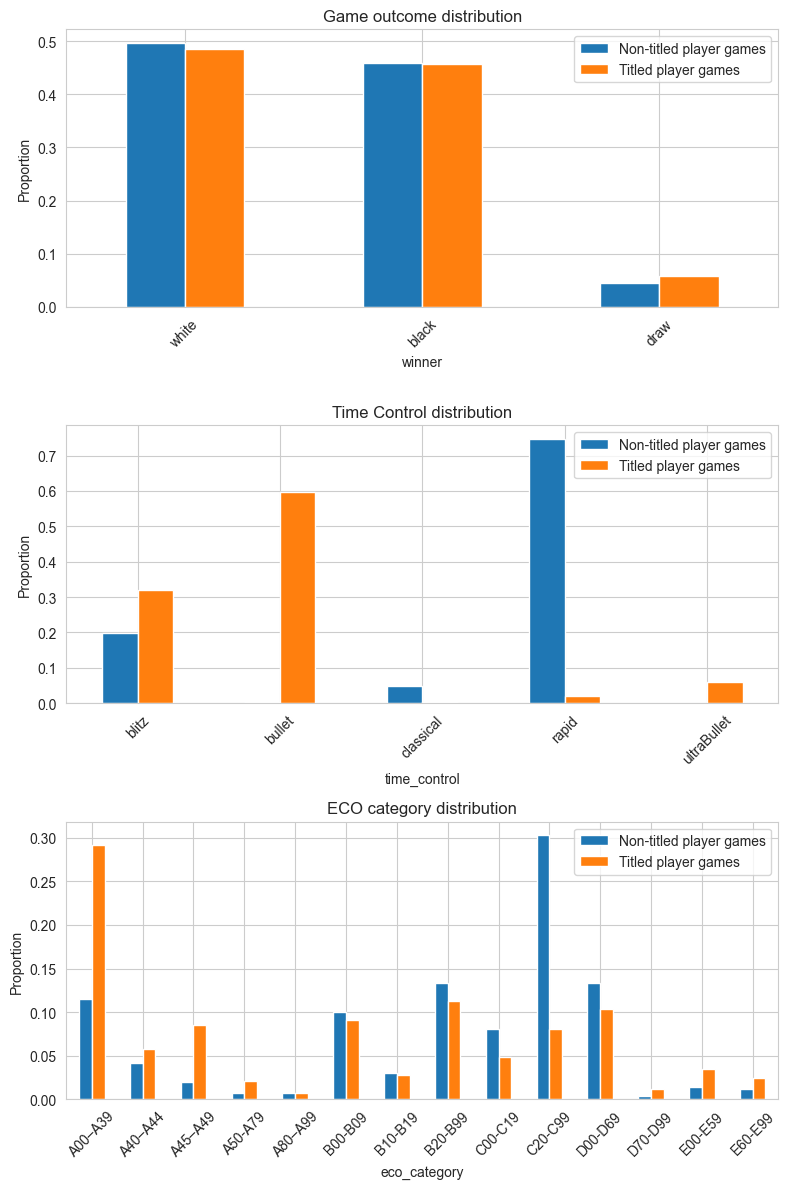

In [40]:
fig, axes = plt.subplots(3, figsize=(8, 12))

prop_df_dict['winner'].plot(kind = 'bar', ax = axes[0])
axes[0].set_title('Game outcome distribution')
axes[0].set_ylabel('Proportion')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


prop_df_dict['time_control'].plot(kind = 'bar', ax = axes[1])
axes[1].set_title('Time Control distribution')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

prop_df_dict['eco_category'].plot(kind = 'bar', ax = axes[2])
axes[2].set_title('ECO category distribution')
axes[2].set_ylabel('Proportion')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

plt.tight_layout()

plt.show()

In the non-titled player games, rapid is by far the most popular time control format, while ultrabullet and bullet are the least popular, virtually non-existent among non-titled players.
A majority of games are won by white, which makes sense given first move advantage.
As previously seen, opening category C20-C99 was very popular among various skill levels.

However, among the titled players, blitz and bullet are significantly more popular time control formats.
Classical is not played by any titled players, most likely attributed to the fact that they reserve longer thinking games to actual tournaments over the board.
More draws occur, which is most likely attributed to that rating difference between the titled players is smaller.
Titled players use ECO_category A00-A39 significantly more than non-titled players. This is most likely due to the much shorter time formats, where atypical openings are mostly played.

Blitz is most popular across both titled and non titled player games.

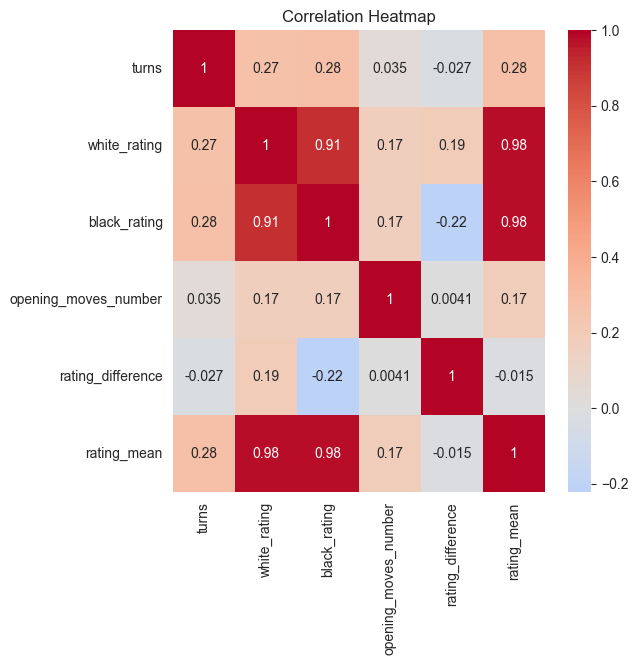

In [41]:
numeric_variables = ['turns','white_rating','black_rating','opening_moves_number','rating_difference','rating_mean']

plt.figure(figsize=(6, 6))
sns.heatmap(all_chess_games_c[numeric_variables].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Players are matched up with other players of similar skill level, hence it makes perfect sense that the ratings are highly correlated.

The higher the number in the variable 'opening_moves_number' the better the players were at opening theory.
Once a player deviates from opening theory, this variable stops counting moves. 
Higher rated players better understand opening theory, hence there is some correlation between the ratings and the opening moves number.
However, as previously seen in the summary statistics, higher rated players play faster time formats where they don't necessarily stick to opening theory

#### 1.3.2 Additional Plots

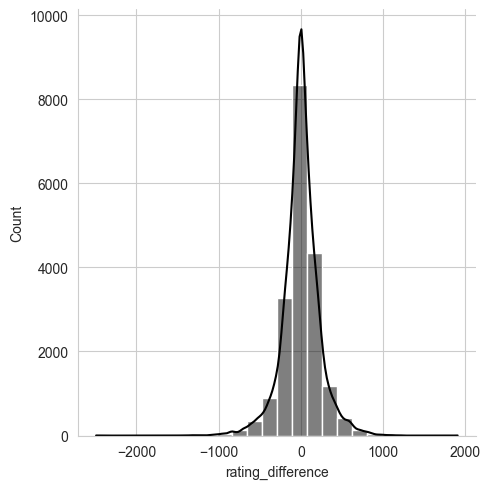

In [42]:
sns.displot(data = all_chess_games_c['rating_difference'], color = 'black', kde = True, bins = 24)

A shape akin to a normal distribution with high kurtosis is to be expected since Lichess matches players of similar skill levels.
Games with big differences in ratings are peculiar, however. When analysing openings, a big rating difference can bias the effectiveness of an opening. For example, one opening might be weak for black, but if black is much higher rated they will no doubt win anyway despite the bad opening.

In [43]:
time_control_means = all_chess_games_c.groupby(['time_control', 'eco_category'])['rating_mean'].mean()

time_control_means_df = pd.DataFrame(time_control_means)

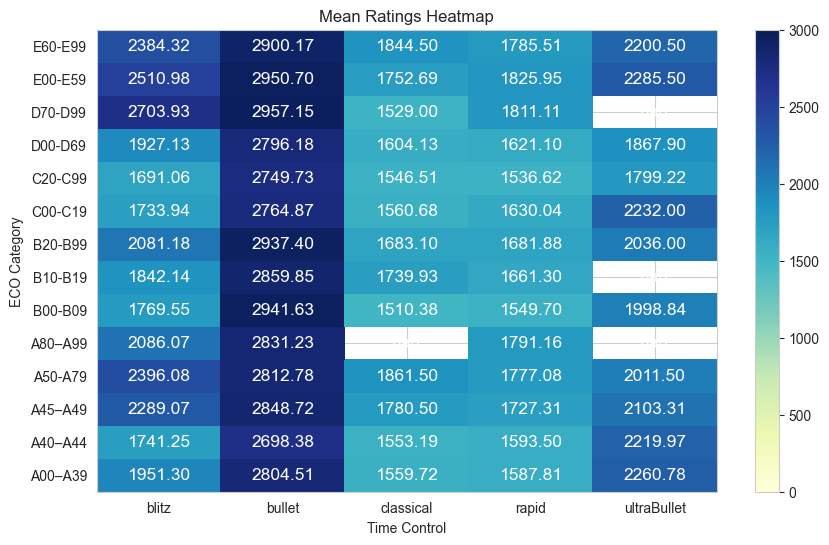

In [44]:
means_table = time_control_means_df.pivot_table(index='eco_category', columns='time_control', values='rating_mean')

plt.figure(figsize=(10, 6))
plt.title('Mean Ratings Heatmap')
heatmap = plt.pcolor(means_table, cmap='YlGnBu', vmin=0, vmax=3000)  # You can adjust the colormap and limits
plt.colorbar(heatmap)

plt.xticks(np.arange(0.5, len(means_table.columns), 1), means_table.columns)
plt.yticks(np.arange(0.5, len(means_table.index), 1), means_table.index)

for i in range(len(means_table.index)):
    for j in range(len(means_table.columns)):
        plt.text(j + 0.5, i + 0.5, f'{means_table.iloc[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12.5)

plt.xlabel('Time Control')
plt.ylabel('ECO Category')

plt.show()

The distribution of mean ratings is nowhere more evident across time control formats than here. Bullet is most populated by high rated players in the dataset. 
The small sample sizes in classical and ultrabullet formats creates 'holes' in the heatmap, where some opening categories have zero entries.

Opening categories in blitz has the most variation in mean rating, further indicating that blitz is popular both among non-titled and titled players. 
Across all time formats, high rated players opens with D70-D99 opening games, except in classical which, as previously seen, titled players tend not to play.

#### 1.3.3 Advanced Plots
In this section I will examine the disparity between which color player won and compare it with their rating. 
In addition, I wish to highlight the titled players' games as well as the games I've played myself.
Since there's variation in player ratings across the time control formats, I want to separate the plots.
To do this I define a scatterplot in a function that splits the dataset up first by time format and then by passing a logical argument in whether I or a titled player played in the game.

In [45]:
from matplotlib.lines import Line2D

def joint_plot_function_by_timeformat(timeformat):
        data1 = all_chess_games_c[(all_chess_games_c['time_control'] == timeformat) &(all_chess_games_c['titled_player_game'] == False) & (all_chess_games_c['carl_game'] == False)]
        data2 = all_chess_games_c[(all_chess_games_c['time_control'] == timeformat) &(all_chess_games_c['carl_game'] == True)]
        data3 = all_chess_games_c[(all_chess_games_c['time_control'] == timeformat) &(all_chess_games_c['titled_player_game'] == True)]
        
        g = sns.JointGrid(x = 'white_rating', y = 'black_rating' , data = data1, space = 0)
        
        sns.scatterplot(data=data1,
                        x='white_rating', y='black_rating', edgecolor='white', hue='winner', marker='o', ax=g.ax_joint, linewidth = 0.5, legend = True)
        sns.scatterplot(data=data2, 
                        x='white_rating', y='black_rating', edgecolor='red', hue='winner', marker='o', ax=g.ax_joint, linewidth = 1.1, legend = False)
        sns.scatterplot(data=data3,
                        x='white_rating', y='black_rating', edgecolor='black', hue='winner', marker='o', ax=g.ax_joint, linewidth = 1.1, legend = False)
        
        g.ax_joint.set_xlabel('White rating')
        g.ax_joint.set_ylabel('Black rating')
        
        legend_elements = [Line2D([0], [0], marker='o', markersize=7, markerfacecolor='none', markeredgecolor='black', alpha=1, label='titled player game', linestyle='none'),
                           Line2D([0], [0], marker='o', markersize=7, markerfacecolor='none', markeredgecolor='red', alpha=1, label='carl game', linestyle='none',)
            ]
            
        handles, labels = g.ax_joint.get_legend_handles_labels()
        handles.extend(legend_elements)
        labels.extend(['titled player game'])
        labels.extend(['Carl game'])
        
        sns.kdeplot(data = all_chess_games_c[(all_chess_games_c['time_control'] == timeformat)], x='white_rating', ax=g.ax_marg_x, hue = 'winner', legend = False)
        sns.kdeplot(data = all_chess_games_c[(all_chess_games_c['time_control'] == timeformat)], y='black_rating',ax=g.ax_marg_y, hue = 'winner', legend = False)
        
        g.ax_joint.legend(handles, labels, bbox_to_anchor=(1.47, 1.35), loc='upper right', title = 'Winner')
    
        g.fig.suptitle(timeformat + ' games by ratings, colored by outcome', y= 1.03)
        
        return g

I gather the time formats in a list.

In [46]:
time_formats_list = list(all_chess_games_c['time_control'].unique())

With everything ready. Instead of looping through the list, I plot the plots separately to give comments to each. 
I originally wished to plot this in a grid, but unfortunately I could not get the function to work in this manner.

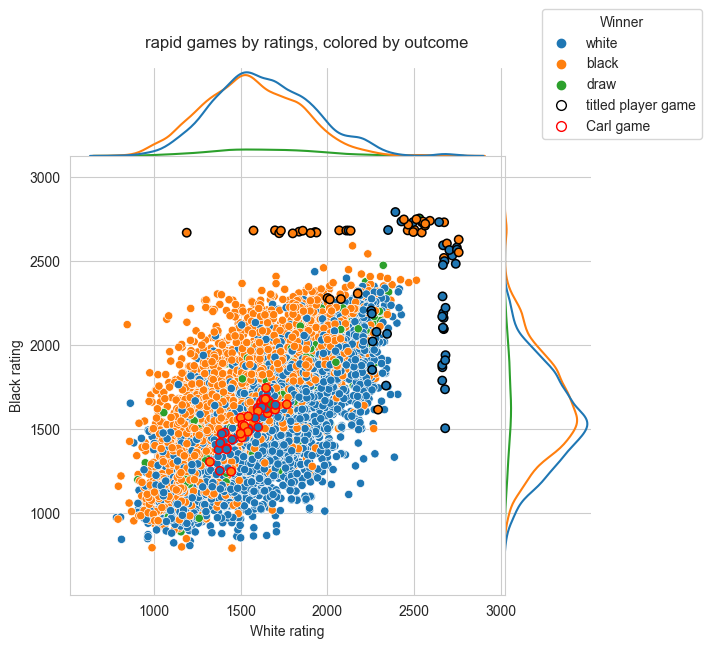

In [47]:
print(joint_plot_function_by_timeformat(time_formats_list[1]))

**Rapid** is the most popular format by non-titled players, which is evident here. The distribution of ratings is quite evenly spread with the significant outliers being the titled player games.
There are a few outliers in surprising wins, for example there's an approx. 2000 rated white player winning against a approx 2500 rated black player. 
The reasoning behind these outliers are merely speculative, where the opening could indeed be a factor.

My own games fluctuate around the 1500 rating mark, of which there are no surprising wins since my opponents were evenly matched in ratings.
Very interestingly, many games in the dataset has considerable differences in ratings between the players - this puts additional weight on the importance of the rating difference for the game outcome.

The symmetry occurring with the titled player games are most likely attributed to rematches against the same opponents wherein they'll switch sides.

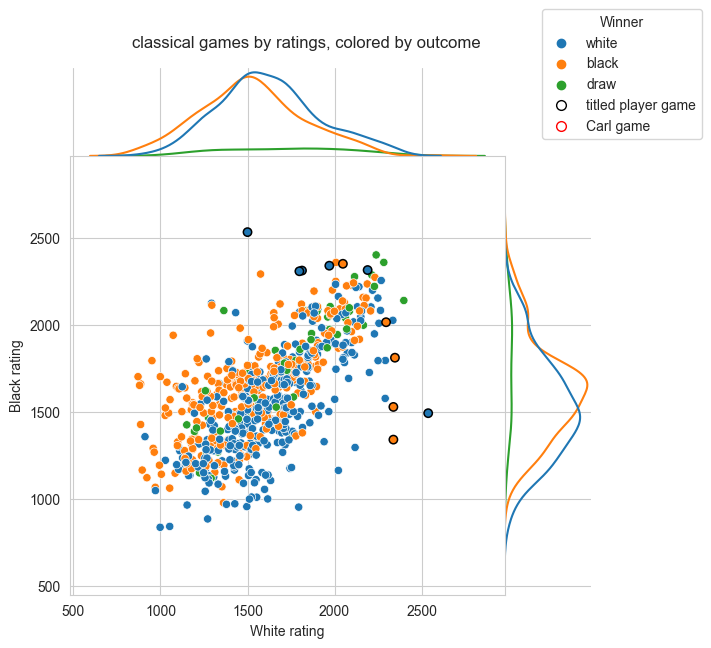

In [48]:
print(joint_plot_function_by_timeformat(time_formats_list[2]))

**Classical** is indeed less popular among titled players, and there's overall less density. I've not played any classical games either.
Since titled players don't play classical much, their ratings on Lichess are lower than what it should be.
It seems with sufficient time to think between moves, there are no big surprises in wins.

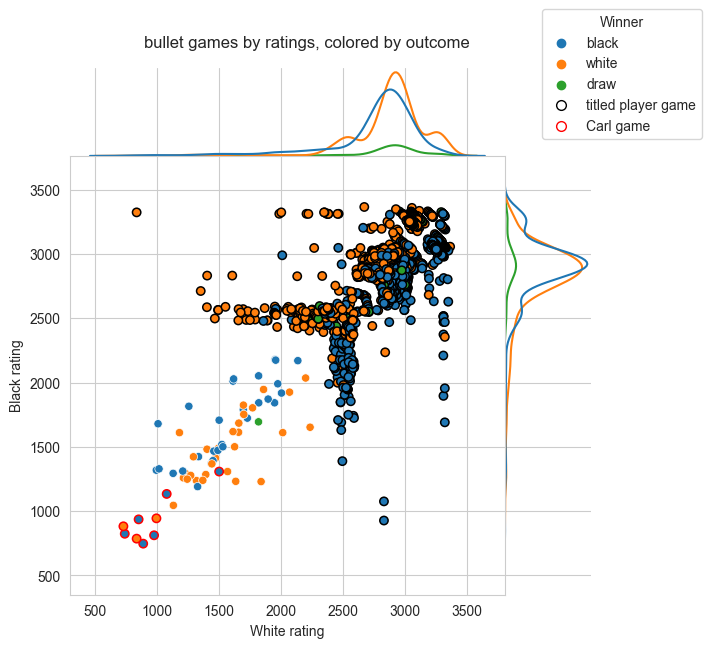

In [49]:
print(joint_plot_function_by_timeformat(time_formats_list[3]))

**Bullet** the most popular format for titled players, wherein the distribution is extremely skewed towards high ratings.
I'm very bad at bullet, hence there is a 'downward' trend in my rating.
Again the symmetry in titled player games can be attributed to rematches where the players switch sides between games. 
Since I've only chosen 10 titled players to extract games from, their games are located largely in the same spot in the plot.

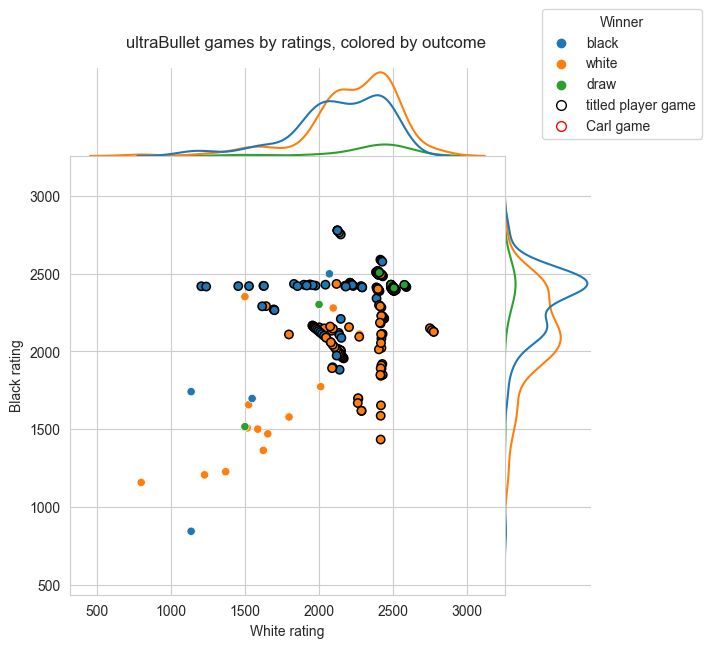

In [50]:
print(joint_plot_function_by_timeformat(time_formats_list[4]))

**Ultrabullet** is the second to last format in popularity, just over classical.
Mostly played by titled players as well - as such there's symmetry in the plot with rematches.

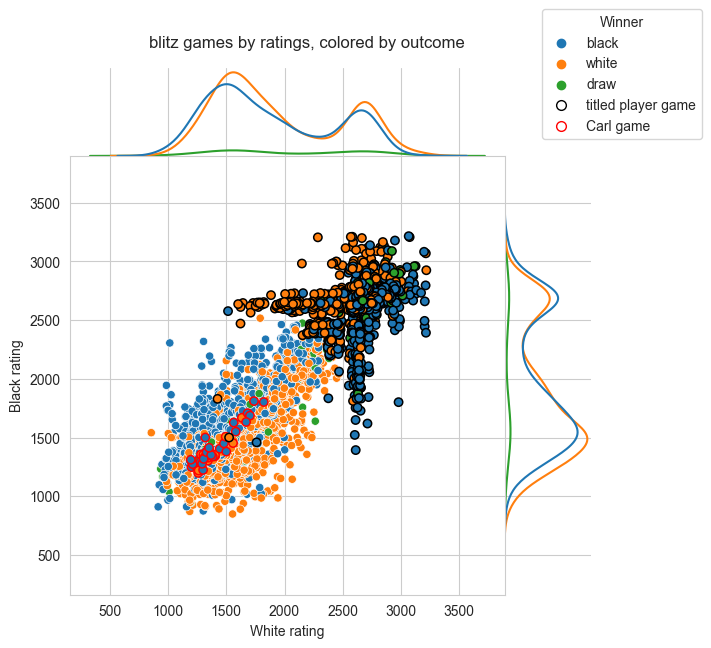

In [51]:
print(joint_plot_function_by_timeformat(time_formats_list[0]))

**Blitz** is popular for both non-titled and titled players.
I've played quite a bit of blitz myself, where I seem to mostly win as white, but don't face any opponents that vastly outmatch me in rating.
Titled players seem to dominate the top ratings, as expected but the density of games in lower ratings is bigger. 
Oddly, there are few titled player games around my skill level. 
This could be a titled player playing their first blitz games on Lichess, where their rating needed to be built up.

### 1.4 Description of descriptive findings
Shortly summarized, in this chapter I explored the chess game dataset and supplementary chess games extracted from Lichess using descriptive analytics. 
In all the games in the dataset, the rapid time format is the most popular among non-titled players while bullet is the most popular among titled players. 
People tend to favor Rapid games, which is most likely attributed to the fact that online chess players want a quick experience, but still want to have sufficient time to think between moves.
However, titled players favor faster time formats - most likely due to the increased challenge, and the fact that longer thinking breaks are reserved for actual over the board tournaments.

Since white always goes first, white is slightly favored in winnings. This is more leveled in titled player games.

Opening category C20-C99 was very popular among various skill levels.
Titled players use ECO_category A00-A39 significantly more than non-titled players. This is most likely due to the much shorter time formats, where atypical openings are mostly played.

Both titled and non-titled players play blitz, with the titled players' games dominating the high levels in density.
The differences in rating is usually very minor because of the matchmaking process that Lichess uses. Players are matched up with other players of similar skill level. 
However, there are some peculiar outliers where one player was rated over 1000 more than their opponent. 
This could be friends of different skill levels that challenge each other to a rated game for one reason or another. The matchmaking process would most likely not match players of such different skill levels against each other.

## 2 Predictive Analytics

This chapter will create a classification prediction model based on the knowledge gained from the descriptive analytics in Chapter _1_.
The purpose of the model is to predict the outcome of a chess game (white win, black win or draw) based on relevant variables included in the dataset.

### 2.1 Basic Requirements

#### 2.1.1 Data preprocessing
The data contains many categorical variables which will need to be encoded in order to use them for any kind of prediction.
First and foremost, the predicted variable is categorical and should therefore be encoded. 
Will encode it manually as follows:
* 0 : White Wins
* 1 : Black Wins
* 2 : Draw

In [52]:
def winner_encoder(winner):
    if winner == 'white':
        return 0
    elif winner == 'black':
        return 1
    else:
        return 2
    
y = all_chess_games_c['winner'].apply(winner_encoder) # Predicted Variable
X = all_chess_games_c.drop('winner', axis = 1)

With the prediction variable being multiclass, I'm dealing with a multiclass classification model which has important implications.
First and foremost as previously seen, the outcomes are imbalanced with draws being significantly less prevalent in the dataset.
Hence, it can be challenging to predict when a draw occurs since it is a rare outcome.

I now examine the rest of the dataset to find which variables make sense to use to predict the winner.

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19176 entries, 0 to 19175
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  19176 non-null  int64  
 1   rated                  19176 non-null  bool   
 2   turns                  19176 non-null  int64  
 3   increment_code         15064 non-null  object 
 4   white_id               19176 non-null  object 
 5   white_rating           19176 non-null  float64
 6   black_id               19176 non-null  object 
 7   black_rating           19176 non-null  float64
 8   moves                  19176 non-null  object 
 9   opening_name           19176 non-null  object 
 10  opening_moves_number   19176 non-null  float64
 11  opening_eco            19176 non-null  object 
 12  id                     19176 non-null  object 
 13  time_control           19176 non-null  object 
 14  game_outcome           4112 non-null   object 
 15  ca

I settle on using the player ratings, their rating differences, the opening category and the time control used for prediction of the game winner.
Due to high cardinality in opening_eco variable, encoding becomes extremely computational intensive or otherwise unsuitable. Therefore, opening category is used.
The rating difference without absolute values is used because it entails information of which player is higher rated.

In [54]:
features = ['white_rating', 'black_rating', 'eco_category','time_control']
X = X.loc[:, features]

With relevant features collected, the encoding of categorical variables and scaling of numerical variables are gathered into a preprocessing pipeline.

In [55]:
from sklearn.compose import make_column_selector

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)

print(cat_selector(X))
print(num_selector(X))

['eco_category', 'time_control']
['white_rating', 'black_rating']


In [56]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_processor = OneHotEncoder(handle_unknown="ignore")
num_processor = StandardScaler()

chess_preprocessor = make_column_transformer(
    (num_processor, num_selector), (cat_processor, cat_selector)
)
chess_preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF38254370>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF3817D000>)])

Above is the preprocess pipeline, which also would include a imputation step in the case of missing data.
However, missing data is already handled.

#### 2.1.2 Model Selection

I've opted for the Random Forest Classifier because of the larger dataset and controlling for overfitting.

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

#### 2.1.3 Model Training
The model is trained by splitting the data. This way there is data that the models can use to train itself in prediction. These predictions are compared with the validation data.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

#### 2.1.4 Model Evaluation

The model is added to the pipeline, which was previously only contained the preprocessing steps.

In [59]:
from sklearn.pipeline import Pipeline

RandomForestClass_pipeline = Pipeline(steps=[
    ('preprocessor', chess_preprocessor),
    ('model', model)
])
RandomForestClass_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF38254370>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF3817D000>)])),
                ('model', RandomForestClassifier(random_state=0))])

The model is assessed using accuracy and precision metrics from scikit-learn. 
To counteract any issues of overfitting that could occur, stratified K-fold cross validation predictions are utilized, which evaluates a multiclass classification model robustly.
In addition, stratified K-fold cross validation is particularly useful here where there are very big sample size differences between the time formats as well as in the ECO category frequencies.
The cross validation method also takes into account the diverse range of players in the dataset, which is done by maintaining balanced distribution in each fold.

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


RandomForestClass_pipeline.fit(X_train, y_train)

preds_cross_val = cross_val_predict(RandomForestClass_pipeline, X_train, y_train, cv = 3)

accuracy_model_onehot = accuracy_score(y_train, preds_cross_val)
precision_model_onehot = precision_score(y_train, preds_cross_val, average='weighted')

# Evaluate the model
print('Accuracy using Random Forest Classifier pipeline with cross validation predictions:', accuracy_score(y_train, preds_cross_val))
print('Precision using Random Forest Classifier pipeline with cross validation predictions:', precision_score(y_train, preds_cross_val, average='weighted'))

Accuracy using Random Forest Classifier pipeline with cross validation predictions: 0.570013037809648
Precision using Random Forest Classifier pipeline with cross validation predictions: 0.5534955076667982


The accuracy of a prediction model is the share of correct predictions among all predictions made.
The precision of a prediction model is the share of correct positive predictions among all positive predictions made.

However, the basic model compiled above might be very weak in its prediction due to the nature of the multiclass classification model. 
In particular, there is a big imbalance in the dataset with draws occurring significantly less than wins in the predictive variable. 
The same can be said for the categorical features where, for example, some openings are much less represented in the data than others. 
It is therefore important to account for overfitting, which can be done with regularization.

### 2.2 Additional Mastery Tasks
In this section additional steps will be employed in attempt to improve the performance of the model.

#### 2.2.1 Advanced Feature Engineering
Due to the nature of chess notation and its meaning for chess positions, text mining on the columns is not suitable for the data. 
This section will try new encoding methods with the model.

##### 2.2.1.1 Count Encoding
Below is a new pipeline where count encoding is carried out instead of one hot encoding. Count encoding is easier on the computer's workload as it reduces curse of dimensionality.


In [61]:
from category_encoders import CountEncoder

cat_processor_count = CountEncoder(handle_unknown=0, handle_missing='value')

chess_preprocessor_count = make_column_transformer(
    (num_processor, num_selector), (cat_processor_count, cat_selector)
)

This is combined with the previous model in a new pipeline.

In [62]:
RandomForestClass_pipeline_count = Pipeline(steps=[
    ('preprocessor', chess_preprocessor_count),
    ('model', model)
])
RandomForestClass_pipeline_count

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF38254370>),
                                                 ('countencoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               handle_unknown=0),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF3817D000>)])),
                ('model', RandomForestClassifier(random_state=0))])

The model is evaluated and compared with the basic model that was previously run.
 

In [63]:
RandomForestClass_pipeline_count.fit(X_train, y_train)

preds_cross_val_count = cross_val_predict(RandomForestClass_pipeline_count, X_train, y_train, cv = 3)

accuracy_model_count = accuracy_score(y_train, preds_cross_val_count)
precision_model_count = precision_score(y_train, preds_cross_val_count, average='weighted')

print('Accuracy using Random Forest Classifier pipeline with count encoding:' , accuracy_model_count)
print('This is a', accuracy_model_count - accuracy_model_onehot, 'difference from the basic model')
print('---------')
print('Precision using Random Forest Classifier pipeline with count encoding:', precision_model_count)
print('This is a', precision_model_count - precision_model_onehot, 'difference from the basic model')

Accuracy using Random Forest Classifier pipeline with count encoding: 0.5830508474576271
This is a 0.013037809647979182 difference from the basic model
---------
Precision using Random Forest Classifier pipeline with count encoding: 0.5628047584267996
This is a 0.00930925076000133 difference from the basic model


##### 2.2.1.2 CatBoost Encoding
CatBoosting can prove to be especially useful for this prediction model. 
As previously mentioned, the data includes categorical features with rarities in them. CatBoosting includes regularization which counteracts overfitting from this issue.

In [64]:
from category_encoders import CatBoostEncoder

In [65]:
catboost_encoder = CatBoostEncoder()

chess_preprocessor_catboost = make_column_transformer(
    (num_processor, num_selector), (catboost_encoder, cat_selector))

RandomForestClass_pipeline_catboost = Pipeline(steps=[
    ('preprocessor', chess_preprocessor_catboost),
    ('model', model)
])
RandomForestClass_pipeline_catboost

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF38254370>),
                                                 ('catboostencoder',
                                                  CatBoostEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF3817D000>)])),
                ('model', RandomForestClassifier(random_state=0))])

In [66]:
RandomForestClass_pipeline_catboost.fit(X_train, y_train)

preds_cross_val_catboost = cross_val_predict(RandomForestClass_pipeline_catboost, X_train, y_train, cv = 3)

accuracy_model_catboost = accuracy_score(y_train, preds_cross_val_catboost)
precision_model_catboost = precision_score(y_train, preds_cross_val_catboost, average='weighted')

print('Accuracy using Random Forest Classifier pipeline with Catboost encoding:' , accuracy_model_catboost) 
print('This is a', accuracy_model_catboost - accuracy_model_onehot, 'difference from the basic model')
print('---------')
print('Precision using Random Forest Classifier pipeline with Catboost encoding:', precision_model_catboost)
print('This is a', precision_model_catboost - precision_model_onehot, 'difference from the basic model')

Accuracy using Random Forest Classifier pipeline with Catboost encoding: 0.5904823989569752
This is a 0.020469361147327225 difference from the basic model
---------
Precision using Random Forest Classifier pipeline with Catboost encoding: 0.5680169533554702
This is a 0.014521445688671974 difference from the basic model


In [67]:
encoding_results = {'Categorical Encoder' : ['One-hot encoder', 'Count encoder','CatBoost'],
                    'Accuracy' : [accuracy_model_onehot, accuracy_model_count, accuracy_model_catboost],
                    'Precision' : [precision_model_onehot, precision_model_count, precision_model_catboost]}

encoding_results_dataframe = pd.DataFrame(encoding_results)

encoding_results_dataframe

,Categorical Encoder,Accuracy,Precision
0,One-hot encoder,0.570013,0.553496
1,Count encoder,0.583051,0.562805
2,CatBoost,0.590482,0.568017


Catboost encoding is the most efficient encoding method in terms of model prediction accuracy and precision.


#### 2.2.2 Unsupervised Learning as Feature Input
To input additional features with unsupervised learning, I've opted for performing Principal Component analysis as well as cluster analysis.


##### 2.2.2.1 Principal Component Analysis (PCA)
PCA will use the preexisting features in the dataset to reduce dimensions and attempt to identify which features contribute variance.
Ultimately PCA can be added to the other features in the dataset to strengthen model performance, especially because of overfitting risk in multiclass classification.

Firstly the preexisting features must be encoded and standardized.

In [68]:
X_encoded = catboost_encoder.fit_transform(X, y)

X_processed = num_processor.fit_transform(X_encoded)

X_processed_df = pd.DataFrame(X_processed, columns=features)

Using sklearn, I perform PCA on the processed features.

In [69]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca_ini = pca.fit_transform(X_processed_df)

In [70]:
X_pca_ini

array([[ 1.37818254, -0.31865575, -0.08208423, -0.07292962],
       [-1.51507286, -6.54382769, -7.59145586,  0.01270439],
       [ 0.99370966, -0.21044505, -0.05209106,  0.0243482 ],
       ...,
       [-1.50854738,  1.16787485, -0.16324494, -0.34196493],
       [-1.88450653,  1.27779941, -0.12943688,  0.01269073],
       [-2.01250249,  0.68147005,  0.40762373, -0.01325784]])

To determine the efficient number of components to add as features, I utilize a scree plot. 
In the scree plot I attempt to look at the 'elbow point', which is where the curve begins to flatten. At this point the variance explained by additional components is diminishing.

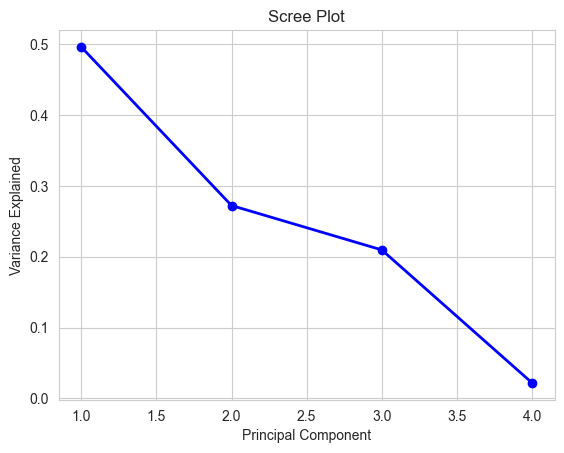

In [71]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [72]:
pca.explained_variance_ratio_[:2].sum()

0.7686708689984386

The elbow in the scree plot suggests that 2 principal components capture a majority of the variance. 
2 will therefore be added to the rest of the features.

In [73]:
X_pca_combined = pd.concat([X, pd.DataFrame(X_pca_ini[:, :2], columns = ['Principal_component_1', 'Principal_component_2'])], axis = 1)

With the added features, the dataset should be split anew.

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(X_pca_combined, y, train_size=0.8, test_size=0.2, random_state=0)

The Random Forest Classifier model is fitted again to include the new features from PCA.

In [75]:
RandomForestClass_pipeline_catboost_pca = Pipeline(steps=[
    ('preprocessor', chess_preprocessor_catboost),
    ('model', model)
])

In [76]:
RandomForestClass_pipeline_catboost_pca.fit(X_train, y_train)

preds_cross_val_catboost_pca = cross_val_predict(RandomForestClass_pipeline_catboost_pca, X_train, y_train, cv = 3)

accuracy_model_catboost_pca = accuracy_score(y_train, preds_cross_val_catboost_pca)
precision_model_catboost_pca = precision_score(y_train, preds_cross_val_catboost_pca, average='weighted')

In [77]:

print('Accuracy using Random Forest Classifier pipeline with added features:' , accuracy_model_catboost_pca) 
print('This is a', accuracy_model_catboost_pca - accuracy_model_catboost, 'difference from the basic model')
print('---------')
print('Precision using Random Forest Classifier pipeline with added features:', precision_model_catboost_pca)
print('This is a', precision_model_catboost_pca - precision_model_catboost, 'difference from the basic model')

Accuracy using Random Forest Classifier pipeline with added features: 0.6011734028683181
This is a 0.010691003911342922 difference from the basic model
---------
Precision using Random Forest Classifier pipeline with added features: 0.5795737234976757
This is a 0.011556770142205464 difference from the basic model


##### 2.2.2.2 Cluster Analysis
With cluster analysis, unsupervised learning is used to reveal any hidden relationships that might exist between features in the data.
This information can be used as an additional feature along with the rest of the features.

Given the elbow in the scree plot using PCA, I determine the optimal number of clusters as 2.
I use sklearn Kmeans clustering on the dimension reduced principal components

In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0)

X_clustered = kmeans.fit_predict(X_pca_ini)

The clustering results are plotted for visual inspection.

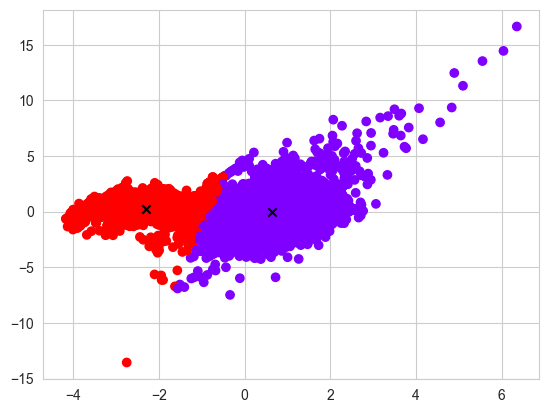

In [79]:
plt.scatter(X_pca_ini[:, 0], X_pca_ini[:, 1], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', marker = 'x')
plt.show()

It seems that there is some overlap in the clusters, with no clear border between the clusters. There might be some underlying complexity causing this.

DBSCAN clustering was attempted as well, but resulted in very uneven clusters.

With the Kmeans clustering done, I add the clustering as an additional feature.

In [80]:
X_cluster_combined = pd.concat([X, pd.DataFrame({'Cluster Assignment' : X_clustered})], axis = 1)

Like PCA, this is then split, retrained and refit to the model

In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(X_cluster_combined, y, train_size=0.8, test_size=0.2, random_state=0)

In [82]:
RandomForestClass_pipeline_catboost_cluster = Pipeline(steps=[
    ('preprocessor', chess_preprocessor_catboost),
    ('model', model)
])

In [83]:
RandomForestClass_pipeline_catboost_cluster.fit(X_train, y_train)

preds_cross_val_catboost_cluster = cross_val_predict(RandomForestClass_pipeline_catboost_cluster, X_train, y_train, cv = 3)

accuracy_model_catboost_cluster = accuracy_score(y_train, preds_cross_val_catboost_cluster)
precision_model_catboost_cluster = precision_score(y_train, preds_cross_val_catboost_cluster, average='weighted')

In [84]:
print('Accuracy using Random Forest Classifier pipeline with added features:' , accuracy_model_catboost_cluster) 
print('This is a', accuracy_model_catboost_cluster - accuracy_model_catboost, 'difference from the basic model')
print('---------')
print('Precision using Random Forest Classifier pipeline with added features:', precision_model_catboost_cluster)
print('This is a', precision_model_catboost_cluster - precision_model_catboost, 'difference from the basic model')

Accuracy using Random Forest Classifier pipeline with added features: 0.5913950456323338
This is a 0.0009126466753586193 difference from the basic model
---------
Precision using Random Forest Classifier pipeline with added features: 0.5689446039633862
This is a 0.0009276506079159974 difference from the basic model


##### 2.2.2.3 Both PCA and Clustering features
Since both unsupervised learning features yielded improvement in the performance, I will add them as features in the model. 

In [85]:
X_unsup = pd.concat([X_pca_combined, pd.DataFrame({'Cluster Assignment' : X_clustered})], axis = 1)

I split, retrain and fit the model.

In [86]:
X_train, X_valid, y_train, y_valid = train_test_split(X_unsup, y, train_size=0.8, test_size=0.2, random_state=0)

In [87]:
RandomForestClass_pipeline_catboost_unsup = Pipeline(steps=[
    ('preprocessor', chess_preprocessor_catboost),
    ('model', model)
])

In [88]:
RandomForestClass_pipeline_catboost_unsup.fit(X_train, y_train)

preds_cross_val_catboost_unsup = cross_val_predict(RandomForestClass_pipeline_catboost_unsup, X_train, y_train, cv = 3)

accuracy_model_catboost_unsup = accuracy_score(y_train, preds_cross_val_catboost_unsup)
precision_model_catboost_unsup = precision_score(y_train, preds_cross_val_catboost_unsup, average='weighted')

The results are gathered in a table for comparison

In [89]:
unsup_results = {'Features': ['Basic', 'PCA', 'Clustering','PCA and Clustering'],
                    'Accuracy': [accuracy_model_catboost, accuracy_model_catboost_pca, accuracy_model_catboost_cluster, accuracy_model_catboost_unsup],
                    'Precision': [precision_model_catboost, precision_model_catboost_pca, precision_model_catboost_cluster, precision_model_catboost_unsup]}

unsup_results_dataframe = pd.DataFrame(unsup_results)

unsup_results_dataframe

,Features,Accuracy,Precision
0,Basic,0.590482,0.568017
1,PCA,0.601173,0.579574
2,Clustering,0.591395,0.568945
3,PCA and Clustering,0.599804,0.578079


It seems that PCA as the sole unsupervised learning feature input performs better than a combination of both unsupervised learning methods.
Hence, for the rest of the portfolio the PCA components are used as features in conjunction with the preexisting features.

To avoid any mishaps with wrongly definition of variables, I run the model with PCA again.

In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(X_pca_combined, y, train_size=0.8, test_size=0.2, random_state=0)

RandomForestClass_pipeline_catboost_pca = Pipeline(steps=[
    ('preprocessor', chess_preprocessor_catboost),
    ('model', model)
])
RandomForestClass_pipeline_catboost_pca.fit(X_train, y_train)

preds_cross_val_catboost_pca = cross_val_predict(RandomForestClass_pipeline_catboost_pca, X_train, y_train, cv=3)

accuracy_model_catboost_pca = accuracy_score(y_train, preds_cross_val_catboost_pca)
precision_model_catboost_pca = precision_score(y_train, preds_cross_val_catboost_pca, average='weighted')

#### 2.2.3 Model Stacking & Different models
In this section I will compare different models and evaluate their performance against each other. 
Other models chosen are: K neighbors classifier, decision tree classifier, which will be stacked with the random forest in a stacking classifier.

Since CatBoost encoding proved to be the best among the encodings in section _2.2.1.2_, it will be used in the new models as well.

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClass_pipeline_catboost = make_pipeline(chess_preprocessor_catboost, DecisionTreeClassifier())

KNeighbors_pipeline_catboost = make_pipeline(chess_preprocessor_catboost, KNeighborsClassifier())

Now all the models are collected in pipelines of their own, these will now be collected in a big pipeline which incorporates each model. 
For classification models, a logistic regression is used as a Meta Model i.e. when stacking other models.
The stacking classifier does not support multi label classification, hence the OneVsRest Classifier is applied to the stacking classifier.

The OneVsRest classifier splits the multiclass classification problem into binary problems.
Hence, the classifications become White Win vs (Black win or Draw), Black Win vs (White Win or Draw) and Draw vs (White Win or BLack Win)
While this makes multiclass classification possible, it is also more computational demanding. Luckily, I'm only dealing with three possible classes.

In [92]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('Random Forest Classifier', RandomForestClass_pipeline_catboost),
    ('K Neighbors Classifier', KNeighbors_pipeline_catboost),
    ('Decision Tree Classifier', DecisionTreeClass_pipeline_catboost),
]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
ovr_model = OneVsRestClassifier(stacking_classifier)

ovr_model

OneVsRestClassifier(estimator=StackingClassifier(estimators=[('Random Forest '
                                                              'Classifier',
                                                              Pipeline(steps=[('preprocessor',
                                                                               ColumnTransformer(transformers=[('standardscaler',
                                                                                                                StandardScaler(),
                                                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF38254370>),
                                                                                                               ('catboostencoder',
                                                                                                                CatBoostEncoder(cols=['eco_category',
                                                                                                                                      'time_control']),
                                                                                                                <sk...
                                                                                                                StandardScaler(),
                                                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF38254370>),
                                                                                                               ('catboostencoder',
                                                                                                                CatBoostEncoder(cols=['eco_category',
                                                                                                                                      'time_control']),
                                                                                                                <sklearn.compose._column_transformer.make_column_selector object at 0x000001FF3817D000>)])),
                                                                              ('decisiontreeclassifier',
                                                                               DecisionTreeClassifier())]))],
                                                 final_estimator=LogisticRegression()))

Now that every model is ready to be utilized, I assess the performance of each model using the same metrics as before: accuracy and precision.

In [93]:
KNeighbors_pipeline_catboost.fit(X_train, y_train)

preds_cross_val_catboost_KNeighbors = cross_val_predict(KNeighbors_pipeline_catboost, X_train, y_train, cv = 3)

accuracy_model_catboost_KNeighbors = accuracy_score(y_train, preds_cross_val_catboost_KNeighbors)
precision_model_catboost_KNeighbors = precision_score(y_train, preds_cross_val_catboost_KNeighbors, average='weighted')

In [94]:
DecisionTreeClass_pipeline_catboost.fit(X_train, y_train)

preds_cross_val_catboost_DecisionTreeClass = cross_val_predict(DecisionTreeClass_pipeline_catboost, X_train, y_train, cv = 3)

accuracy_model_catboost_DecisionTreeClass = accuracy_score(y_train, preds_cross_val_catboost_DecisionTreeClass)
precision_model_catboost_DecisionTreeClass = precision_score(y_train, preds_cross_val_catboost_DecisionTreeClass, average='weighted')

In [95]:
ovr_model.fit(X_train, y_train)

preds_cross_val_ovr = cross_val_predict(ovr_model, X_train, y_train, cv = 3)

accuracy_model_ovr = accuracy_score(y_train, preds_cross_val_ovr)
precision_model_ovr = precision_score(y_train, preds_cross_val_ovr, average='weighted')

To better compare the performance of each model, the accuracy and precision scores are collected in a dataframe.

In [96]:
stacking_results = {
    'Model': ['Random Forest Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier', 'Stacking Classifier'],
    'Accuracy': [accuracy_model_catboost, accuracy_model_catboost_KNeighbors, accuracy_model_catboost_DecisionTreeClass,
                 accuracy_model_ovr],
    'Precision': [precision_model_catboost, precision_model_catboost_KNeighbors,
                  precision_model_catboost_DecisionTreeClass, precision_model_ovr]}

stacking_results_dataframe = pd.DataFrame(stacking_results)

stacking_results_dataframe

,Model,Accuracy,Precision
0,Random Forest Classifier,0.590482,0.568017
1,KNeighbors Classifier,0.580965,0.556305
2,Decision Tree Classifier,0.527314,0.532544
3,Stacking Classifier,0.603194,0.575031


The stacking classifier proves to be the most accurate and precise in predicting the outcome of a chess game, with the Random Forest Classifier being a close second. 

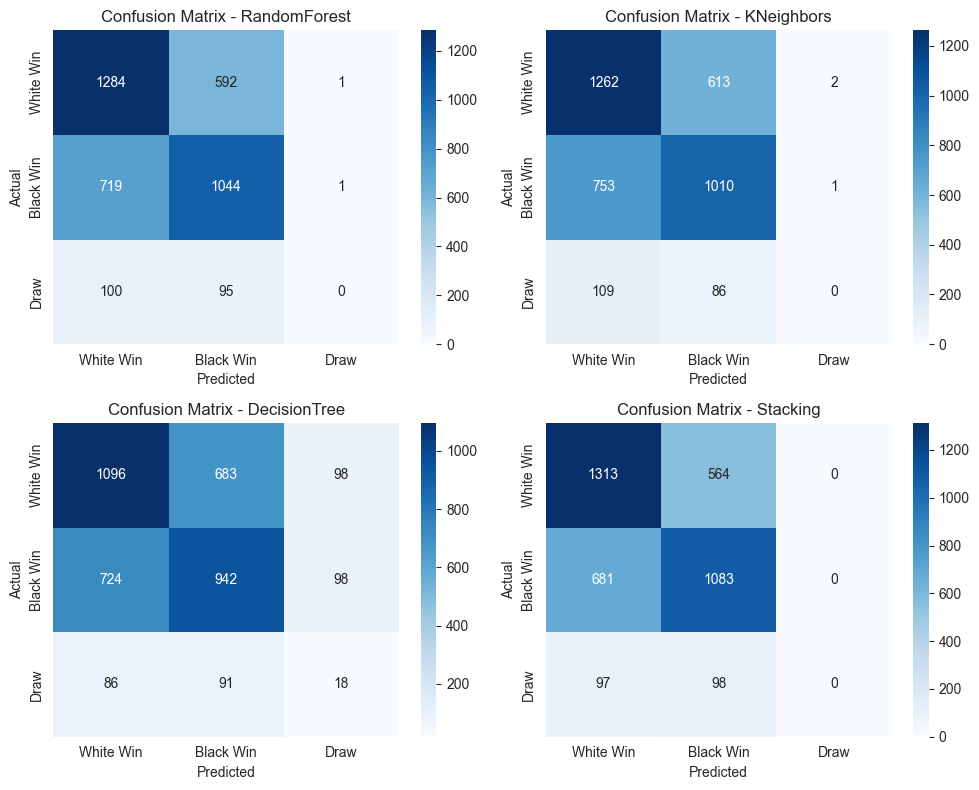

In [97]:
from sklearn.metrics import confusion_matrix
models = [RandomForestClass_pipeline_catboost, KNeighbors_pipeline_catboost, DecisionTreeClass_pipeline_catboost, ovr_model]
model_names = ['RandomForest', 'KNeighbors', 'DecisionTree', 'Stacking']

plt.figure(figsize=(10, 8))
for i, model in enumerate(models):
    plt.subplot(2, 2, i+1)
    y_pred = model.predict(X_valid)
    cm = confusion_matrix(y_valid, y_pred) 
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["White Win", "Black Win", "Draw"],
                yticklabels=["White Win", "Black Win", "Draw"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_names[i]}')
plt.tight_layout()
plt.show()


The interpretation of the confusion matrices are as follows. On the diagonal are correct predictions made by the model, while the non-diagonal elements indicate wrong predictions.
Hence, in the Stacking Model by looking at the 'White Win' predicted column: of all the predictions made, 1310 were correct white win predictions, 679 were incorrect predictions were black actually won and 97 were incorrect predictions which were a draw. Likewise, the Stacking Model predicted zero draws, when there actually was 97+98=195 draws.
This is of course, an inherent problem in that problem that draws are not predicted in any of the models except the Decision Tree Classifer.
While the Decision Tree Classifier correctly predicted some draws, it vastly miss-predicts draws, indicated by the column of predicted draws.

The slightly superior performance of the Stacking Classifier makes it the most efficient model of all four models. However, in future work fine-tuning hyperparameters and feature engineering might be required to enhance the model.

#### 2.2.4 Feature Importance/Diagnostic
In this section I will investigate the importance of each feature used to predict the outcome of a chess game. Each model evaluated is investigated.


In [98]:
from sklearn.inspection import permutation_importance

models_feature_importances = pd.DataFrame(
    columns=['Random Forest Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier', 'Stacking Classifier'],
    index=X_train.columns)

RandomForestClass_feature_importances = permutation_importance(RandomForestClass_pipeline_catboost_unsup, X_pca_combined, y, n_repeats=10, random_state=0)
KNeighbors_feature_importances = permutation_importance(KNeighbors_pipeline_catboost, X_pca_combined, y, n_repeats=10, random_state=0)
DecisionsTreeClass_feature_importances = permutation_importance(DecisionTreeClass_pipeline_catboost, X_pca_combined, y, n_repeats=10, random_state=0)
StackingClass_feature_importances = permutation_importance(ovr_model, X_pca_combined, y, n_repeats=10, random_state=0)

The mean result from using the _permutation_importance_ function is added to a dataframe of the feature importance of each model.

In [99]:
models_feature_importances['Random Forest Classifier'] = RandomForestClass_feature_importances.importances_mean
models_feature_importances['KNeighbors Classifier'] = KNeighbors_feature_importances.importances_mean
models_feature_importances['Decision Tree Classifier'] = DecisionsTreeClass_feature_importances.importances_mean
models_feature_importances['Stacking Classifier'] = StackingClass_feature_importances.importances_mean

models_feature_importances

,Random Forest Classifier,KNeighbors Classifier,Decision Tree Classifier,Stacking Classifier
white_rating,0.236175,0.167501,0.192459,0.241729
black_rating,0.241724,0.173102,0.203572,0.244650
eco_category,0.032259,0.002138,0.035367,0.024213
time_control,0.014080,0.000318,0.013548,0.003942
Principal_component_1,0.112875,0.102446,0.112980,0.104881
Principal_component_2,0.080841,0.100631,0.084288,0.086812


A bar plot is constructed to better compare the importance of each feature between the models.

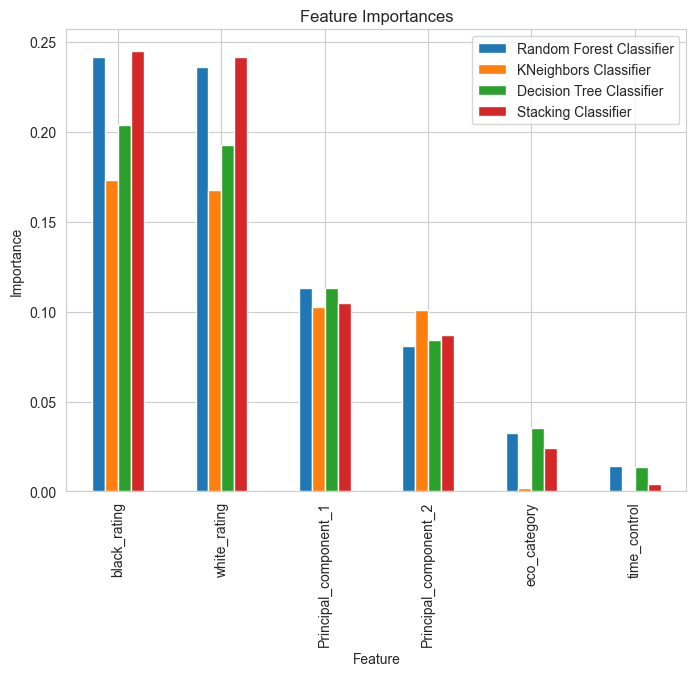

In [100]:
models_feature_importances_sorted = models_feature_importances.sort_values(by = 'Stacking Classifier', ascending = False)
features_plot = models_feature_importances_sorted.plot(kind = 'bar', figsize = (8,6))

plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')

plt.show()

From the plot above it is evident that all the models regard the ratings of each player as the biggest contributing variables in predicting the winner of a chess game.
The fact that these features drives the game outcome is evident from section _1.3.3 Advanced Plots_, where many games were not evenly matched in player skill ratings. 

Interestingly, black_rating is deemed a slightly more important feature than white_rating, which goes against consensus that white has an inherent advantage in chess as the first mover.
This might be due to the fact that the black player must be prepared for potential tricky moves by white that must be met with correct play.

The principal components derived from the dataset have a significant importance to the models.
By nature, interpretation of principal components can be especially tricky as they capture some underlying variance and essence in the data.

However, time_control and eco_category are sufficiently small in value of importance in the KNeighbors classifier that they don't even appear in the plot. It seems highly improbable that the opening would contribute so little to the prediction, which indicates that the KNeighbors classifier is an erratic model for this type of analysis. 

## 3 Prescriptive Analytics

In this chapter, I will use the Warehouse Location Problem (WLP), to cluster chess games solely based on the moves played in the game.
Next, I will use the predictive stacking model from chapter 2 in an optimization model to determine which openings to practice for best winning chances.

### 3.1 Clustering Through the Warehouse Location Problem (WLP)
The Warehouse Location Problem is a problem that uses physical distances between cities. 
For analysing the chess games, I've opted for using multidimensional scaling **(MDS)** to create the distances between the games.

Particularly I wish to explore similarities between the openings of the chess games based solely on the moves played.
Therefore, I will pretend that the official ECO openings are not present in the data and only regard the actual moves played.

#### 3.1.1 Preprocessing
The chess dataset includes a large number of games - I therefore randomly select 100 games to analyse. 
To compare the official ECO code with each game, I rename the indexes of the games according to their ECO code 

In [101]:
random_chess_games = all_chess_games_c.sample(n = 100, random_state = 0)
new_index = random_chess_games.groupby('opening_eco').cumcount().astype(str)
random_chess_games.index = random_chess_games['opening_eco'].astype(str) + '_' + new_index

I drop all variables except the moves and opening moves number.

In [102]:
random_chess_games = random_chess_games[['moves','opening_moves_number']]

Since the moves are contained in a single column, I split each move into separate columns and remove all moves after the openings.
The 'opening_moves_number' variable is used to determine how many moves there are in the opening, of which I limit the moves to the maximum of 'opening_moves_number'

In [103]:
random_chess_games_moves = random_chess_games['moves'].str.split(expand=True)

random_chess_games_moves.columns = [f'move_{i+1}' for i in random_chess_games_moves.columns]

longest_opening = int(random_chess_games['opening_moves_number'].max())
random_chess_games_moves = random_chess_games_moves.iloc[:, :longest_opening]

random_chess_games = pd.concat([random_chess_games, random_chess_games_moves], axis = 1)

I remove the 'moves' and 'openings_moves_number', which leaves only the moves in order along the columns.

In [104]:
random_chess_games = random_chess_games.drop(columns = ['moves', 'opening_moves_number'])

print(random_chess_games.head())

      move_1 move_2 move_3 move_4 move_5 move_6 move_7 move_8 move_9 move_10  \
B50_0     e4     c5    Nf3     d6     c3    Nf6     d4   Nxe4   dxc5    Nxc5   
C41_0     e4     e5    Nf3     d6    Bc4    Qf6    Nc3     c6     d4      h6   
B30_0     e4     c5    Nf3    Nc6    Bb5    Qb6    Nc3     e5     a4     Nf6   
A04_0    Nf3     c5     g3    Nc6    Bg2     e5     d3     h6    O-O      f5   
C40_0     e4     e5    Nf3     f6   Nxe5   fxe5   Qh5+    Ke7  Qxe5+     Kf7   

      move_11 move_12 move_13 move_14  
B50_0      c4     Qb6     Nc3      e6  
C41_0    dxe5    dxe5     Be3     Bd6  
B30_0      d3      h6      h3      a6  
A04_0      e4      d6    exf5    Bxf5  
C40_0    Qd5+     Kg6    Qf5+     Kh6  


With the columns sorted, there still is the issue of them being merely categorical.
I therefore employ One Hot Encoding to encode the categorical variables to numeric.

In [105]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse_output = False, dtype = int)

encoded_random_chess_games = onehotencoder.fit_transform(random_chess_games.values)

#### 3.1.2 Calculating distances
I employ Euclidean distances to determine the distances between each chess game, which is collected in a distance matrix

In [106]:
from sklearn.metrics import pairwise_distances

euclidean_distance_matrix = pairwise_distances(encoded_random_chess_games, metric='euclidean')

I then perform two axis MDS which is stored in a dataframe with the ECO code indexes kept

In [107]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', normalized_stress = 'auto', random_state = 0)
mds_result = mds.fit_transform(euclidean_distance_matrix)

mds_df = pd.DataFrame(mds_result, columns=['MDS_1', 'MDS_2'], index=random_chess_games.index)

MDS also works with more dimensions, but for simplicity and sake of plotting, I will stick with 2 dimensions.
Before any clustering occurs, I wish to look at the MDS plot.

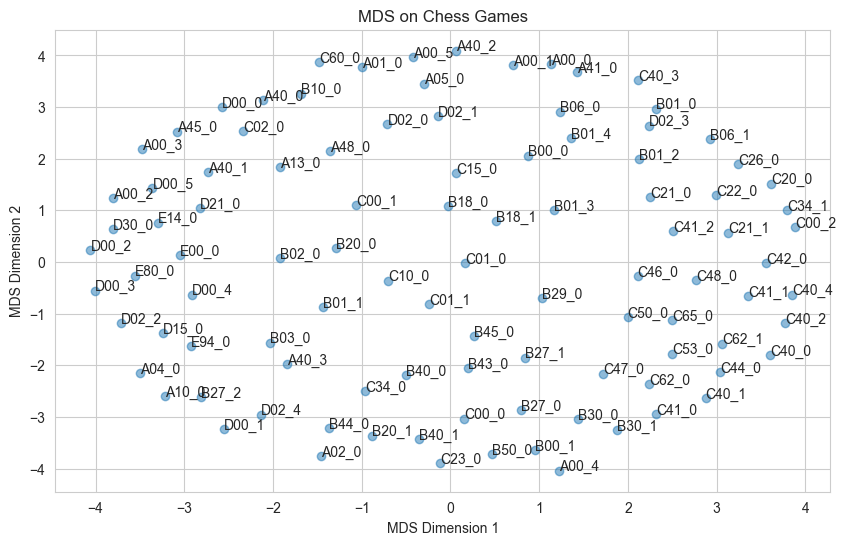

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(mds_df['MDS_1'], mds_df['MDS_2'], alpha=0.5)

for index, row in mds_df.iterrows():
    plt.annotate(index, (row['MDS_1'], row['MDS_2']))

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS on Chess Games')
plt.grid(True)
plt.show()

Many patterns are already forming, indicating similarities between certain games. The ECO notation is definitely captured based on the Euclidean distances between the encoded moves.
Many C openings are located next to each other on the right side of the plot.

* Note: the underscore and number suffix that is added to the ECOs are in the cases of duplicate openings of games.

There are certain oddities occurring in the plot.
 * For example D02_2 (located on the left) and D02_3 (located in the top-right ) designate the same opening, but are placed very differently on the plot
Below these two games and their moves are printed.

In [109]:
random_chess_games.loc[['D02_2', 'D02_3']]

,move_1,move_2,move_3,move_4,move_5,move_6,move_7,move_8,move_9,move_10,move_11,move_12,move_13,move_14
D02_2,Nf3,d5,d4,Bg4,e3,Bxf3,Qxf3,Nf6,c4,e6,c5,c6,b4,a6
D02_3,d4,d5,Nf3,Nf6,Bf4,g6,c3,Bg7,Nbd2,O-O,e3,Nbd7,h3,Re8


The first three moves provides the exact same position, but enough in the later moves the similarity fades. 
Since ECO only knows the first three moves, they are both designated as D02 despite being very different later on in their respective moves.

#### 3.1.3 Formulation of the WLP
First, the optimization problem is defined.

In [110]:
from scipy.spatial.distance import euclidean
from pulp import *

model = LpProblem("Chess Main Games", LpMinimize)

I designate the 'warehouses' as 'main games' and the 'customers' as 'assigned games'
I keep the indexes in a shorter name and designate the max number of clusters being 5.
    5 is chosen because of the letters used in ECO notation (A,B,C,D,E)

In [111]:
game_indexes = mds_df.index.tolist()

max_main_games = 5  

**The decision variables** are listed in code below. *main_game* decides if a game is a main game, while *assignments* decides if a game is assigned to each main game or not

In [112]:
num_games = len(game_indexes)
main_games = LpVariable.dicts("Main Game", game_indexes, cat='Binary')
assignments = LpVariable.dicts("Assign", (game_indexes, game_indexes), cat='Binary')

**The objective function** that need to be minimized is below. The sum of distances between pairs of games is multiplied by respective assignment variables.
This is iterated over all pairs of games.

In [113]:
model += lpSum([euclidean((mds_df.loc[i, 'MDS_1'], mds_df.loc[i, 'MDS_2']),
                         (mds_df.loc[j, 'MDS_1'], mds_df.loc[j, 'MDS_2']))
               * assignments[i][j]
               for i in game_indexes
               for j in game_indexes])

**The constraints** 
First constraint ensures that each game is assigned to exactly one main game cluster
Second constraint ensures that there is a maximum number of games assigned to each cluster does not exceed the total number of games.
Third constraint ensures that the number of main games does not exceed the pre-designated number of 5.

In [114]:
for j in game_indexes:
    model += lpSum([assignments[i][j] for i in game_indexes]) == 1

for i in game_indexes:
    model += lpSum(assignments[i][j] for j in game_indexes) <= num_games * main_games[i]

model += lpSum([main_games[i] for i in game_indexes]) <= max_main_games

#### 3.1.4 Solving the WLP using PuLP & plotting
The model is then solved and results are printed.

In [115]:
model.solve()

print("Status of model:", LpStatus[model.status])

selected_main_games = [game for game, var in main_games.items() if var.value() == 1]
clusters = {}
for main_game in selected_main_games:
    cluster_games = [game for game, var in assignments[main_game].items() if var.value() == 1]
    clusters[main_game] = cluster_games

print("Clusters:")
for main_game, cluster in clusters.items():
    print(f"Main Game: {main_game}, Cluster Games: {cluster}")

Status of model: Optimal
Clusters:
Main Game: C00_0, Cluster Games: ['B50_0', 'C41_0', 'B30_0', 'B30_1', 'A02_0', 'C34_0', 'B43_0', 'C00_0', 'B44_0', 'C47_0', 'B40_0', 'B27_0', 'B45_0', 'B27_1', 'B00_1', 'C23_0', 'B20_1', 'A00_4', 'C01_1', 'B40_1']
Main Game: B06_0, Cluster Games: ['B01_0', 'B18_0', 'B06_0', 'A00_0', 'D02_0', 'A00_1', 'C15_0', 'D02_1', 'A41_0', 'A05_0', 'B01_2', 'B00_0', 'A01_0', 'C40_3', 'C26_0', 'B01_3', 'B06_1', 'B18_1', 'D02_3', 'A40_2', 'B01_4', 'A00_5']
Main Game: C48_0, Cluster Games: ['C40_0', 'C22_0', 'B29_0', 'C01_0', 'C65_0', 'C20_0', 'C46_0', 'C41_1', 'C40_1', 'C48_0', 'C62_0', 'C44_0', 'C41_2', 'C40_2', 'C21_0', 'C21_1', 'C00_2', 'C53_0', 'C50_0', 'C62_1', 'C42_0', 'C34_1', 'C40_4']
Main Game: E94_0, Cluster Games: ['A04_0', 'B01_1', 'D00_1', 'A10_0', 'E94_0', 'B03_0', 'D02_2', 'D00_3', 'D00_4', 'E80_0', 'C10_0', 'D15_0', 'D02_4', 'A40_3', 'B27_2']
Main Game: A40_1, Cluster Games: ['A13_0', 'A40_0', 'D00_0', 'B02_0', 'C00_1', 'D21_0', 'A00_2', 'A45_0', 'D0

While the results above provides insight into how the clusters are formed, the results are easier to interpret on a plot, which is done below.
First the results are stored.

In [116]:
result_data = []
for main_game, cluster in clusters.items():
    result_data.append({
        'Main Game': main_game,
        'Cluster Games': cluster
    })

result_df = pd.DataFrame(result_data)
result_df.to_csv('cluster_results.csv', index=False)

To show the distances from assigned games to main games, the networkx package is used to plot the clusters of games.

In [117]:
import networkx as nx

G = nx.Graph()

for game in game_indexes:
    G.add_node(game, pos=(mds_df.loc[game, 'MDS_1'], mds_df.loc[game, 'MDS_2']))

### distances
for main_game, cluster in clusters.items():
    for game in cluster:
        G.add_edge(main_game, game)

### game positions
pos = nx.get_node_attributes(G, 'pos')

Adding labels to each cluster, which are my interpretations of the clusters given common opening names

In [118]:
cluster_labels = {'Cluster_1' : 'Semi-Open Games & French Defense',
                  'Cluster_2' : 'Semi-Open Games',
                  'Cluster_3' : 'Open Games',
                  'Cluster_4' : 'Indian Defenses',
                  'Cluster_5' : 'Flank Openings'}

In [119]:
for cluster_index, (main_game, cluster) in enumerate(clusters.items()):
    cluster_label = f'Cluster_{cluster_index + 1}'
    G.add_node(cluster_label, pos=(mds_df.loc[main_game, 'MDS_1'], mds_df.loc[main_game, 'MDS_2']))
    G.add_edge(main_game, cluster_label)
    for game in cluster:
        G.add_edge(cluster_label, game)

pos = nx.get_node_attributes(G, 'pos')

Then, the plot can be created

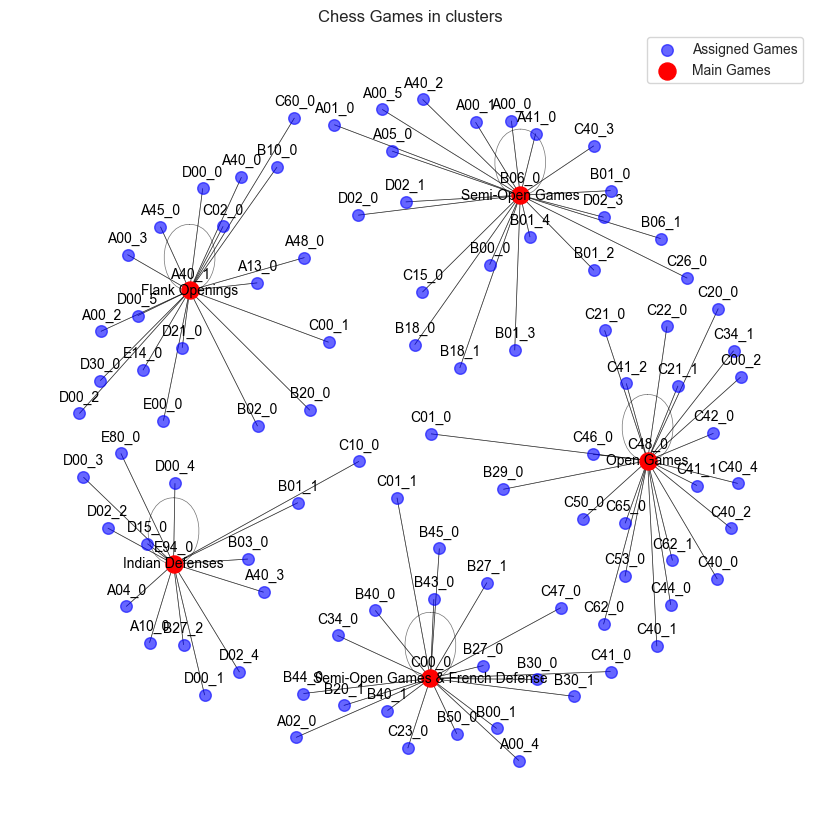

In [120]:
plt.figure(figsize=(8, 8))
assigned_game_points = nx.draw(G, pos, node_size=70, alpha=0.6, node_color='blue', edgelist=[], with_labels=False, label = 'Assigned Games')

### highlights main_games
main_game_points = nx.draw_networkx_nodes(G, pos, nodelist=selected_main_games, node_size=150, node_color='red', label='Main Games')

### draw distances
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.55, edge_color='black')

### indexes - Game ECO 
label_pos = {game: (x, y + 0.20) for game, (x, y) in pos.items()}
labels = {game: str(game) for game in game_indexes}
nx.draw_networkx_labels(G, label_pos, labels, font_size=10, font_color='black')

### cluster labels
cluster_label_positions = {cluster_label: (x, y) for cluster_label, (x, y) in pos.items() if cluster_label.startswith('Cluster')}
cluster_labels = {cluster_label: cluster_labels.get(cluster_label, cluster_label) for cluster_label in cluster_label_positions}
nx.draw_networkx_labels(G, cluster_label_positions, cluster_labels, font_size=10, font_color='black')

plt.legend()

plt.title('Chess Games in clusters')
plt.show()

For clarity the clusters are named as follows:

| Cluster   | Label                            | Main Game |
|-----------|----------------------------------|-----------|
| 1         | Semi-Open Games & French Defense | C00_0     |
| 2         | Semi-Open Games                                | B06_0     |
| 3         |   Open Games                               | C48_0     |
| 4         |     Indian Defenses                             | E94_0     |
| 5         |      Flank Openings                            | A40_1     |

The letter volumes of ECO (A,B,C,D,E) was almost captured as distinct clusters. Only a D cluster, is not present.
It seems that ECO D games transpose into so different games that MDS placed them sufficiently far apart to capture a cluster of them.
Alternatively, it depends largely on the random sample extracted from all the chess games, where other patterns could emerge.

Some of the ECO notations cover broad of variations of chess moves.
Additionally, chess games that start in one way but transpose into a known opening is placed very differently distance wise due to varying first moves.

Perhaps more clusters could be applied or the encoding method could be different to find more similarities between the games.

A third dimension to MDS could also capture more of the similarities.

### 3.2 Bridging Predictive to Prescriptive Models
In this section, I will use the predictive model from chapter 2 to create a optimization problem that suggest time that should be spent on practicing chess openings.

#### 3.2.1 Contextual Understanding
The predictive model I previously formulated was able to predict the winner of a chess games based on the variables in the dataset. 
I consider a hypothetical scenario where I'm studying for a chess tournament. Of all variables in the dataset, the opening employed is an input factor determined by the players. For instance, the player ratings cannot be directly altered during play.

Using the predictions I wish to see which openings should be studied further in order to improve winning chances. 

#### 3.2.2 Prescriptive Formulation
 In the classic knapsack problem there is a budget in the shape and weight of items that can be stored in a knapsack. I will consider the length of the openings as the openings' complexity, which serves as the cost of learning an opening. The opening complexity is therefore the shape and weight of items (openings) that can be stored in my knapsack (my temporal lobe).
It can after all be very hard to memorize many moves. The complexity constraint is an arbitrary number of average number of moves per opening category that need to be memorized.

In addition, there is the question of how much time should be spent on each opening, which is a constraint in of itself.
For demonstration purposes, I've selected 5.8 as the time before the chess tournament, being number of weeks before.

I've constrained this to 20 + 20 = 40 moves memorized per opening category. 20 opening moves for white and 20 for black.
The decision variable is then which opening categories to practice, with an objective function being to maximize winning probabilities.

#### 3.2.3 PuLP Implementation
Below, I will create a simple Implementation of the aforementioned optimization problem.


##### 3.2.3.1 Creating a dictionary of openings
I start by extracting the opening categories from the dataset as well as the number of moves in them. 

In [121]:
opening_complexity = all_chess_games_c[['eco_category','opening_moves_number']]
opening_complexity = opening_complexity.groupby('eco_category').agg({'opening_moves_number' : 'mean', 'eco_category' : 'first'})

opening_complexity = pd.DataFrame(opening_complexity)
opening_complexity = opening_complexity.drop(columns = 'eco_category')

Next, I need to find the win probabilities for each given opening, which is done using the stacking classifier - the best performing prediction model from chapter 2.

In [122]:
predicted_probabilities = ovr_model.predict_proba(X_valid)

In [123]:
test_results = X_valid.copy()
test_results['predicted_winner'] = ovr_model.predict(X_valid)
test_results['white_win_probability'] = predicted_probabilities[:, 0] 
test_results['black_win_probability'] = predicted_probabilities[:, 1] 
test_results['draw_probability'] = predicted_probabilities[:, 2]  

In [124]:
test_results = test_results.drop(columns = ['white_rating', 'black_rating', 'time_control'])
opening_chances = test_results.groupby('eco_category').mean()[['white_win_probability', 'black_win_probability', 'draw_probability']]

Since an opening also depends on what my opponent is playing, I've taken into account the popularity of each opening.
This is done by taking the total share of each opening category played in the dataset. 

In [125]:
freq_opening = pd.DataFrame(all_chess_games_c['eco_category'].value_counts() / len(all_chess_games_c))
freq_opening.columns = ['popularity']

I then combine the three dataframes and convert it to a dictionary.

In [126]:
win_probabilities = pd.concat([opening_complexity, opening_chances, freq_opening], axis = 1)

win_probabilities_dict = win_probabilities.to_dict(orient = 'index')

In [127]:
win_probabilities

,opening_moves_number,white_win_probability,black_win_probability,draw_probability,popularity
eco_category,,,,,
A00–A39,2.536961,0.484896,0.468416,0.046688,0.152378
A40–A44,2.456140,0.512376,0.441301,0.046324,0.044587
A45–A49,3.209231,0.500098,0.454449,0.045453,0.033897
A50-A79,8.098446,0.491344,0.462479,0.046177,0.010065
A80–A99,4.593985,0.493634,0.460668,0.045698,0.006936
B00-B09,4.198514,0.509546,0.444416,0.046038,0.098248
B10-B19,5.181495,0.488977,0.463747,0.047276,0.029307
B20-B99,5.885610,0.452033,0.501703,0.046264,0.129015
C00-C19,5.198160,0.501544,0.452147,0.046309,0.073686


##### 3.2.3.2 Optimization Model Setup
Now I can set up the models, one for white and one for black. As well as determining the complexity capacity and defining the available time:

In [128]:
from pulp import LpVariable, LpProblem, LpMaximize, lpSum

complexity_capacity = 40
available_time = 5.8
model_white = LpProblem("White opening practice", LpMaximize)
model_black = LpProblem("Black opening practice", LpMaximize)

The 'pack' of which openings to practice is defined and the objective function to maximize winning probabilities. 
The popularity of each opening is weighed on the probability of winning, such that more popular openings are prioritized. 

In [129]:
pack = LpVariable.dict("Opening Category : ", win_probabilities_dict.keys(), 0, 1, LpContinuous)
model_white += lpSum(pack[i] * win_probabilities_dict[i]["white_win_probability"] * win_probabilities_dict[i]["popularity"] for i in win_probabilities_dict)
model_black += lpSum(pack[i] * win_probabilities_dict[i]["black_win_probability"] * win_probabilities_dict[i]["popularity"] for i in win_probabilities_dict)

Both models are constrained with the complexity capacity value.

In [130]:
model_white += lpSum(pack[i] * win_probabilities_dict[i]["opening_moves_number"] for i in win_probabilities_dict) <= complexity_capacity / 2
model_black += lpSum(pack[i] * win_probabilities_dict[i]["opening_moves_number"] for i in win_probabilities_dict) <= complexity_capacity / 2

And the available time to practice.

In [131]:
model_white += lpSum(pack[i] for i in win_probabilities_dict) <= available_time / 2
model_black += lpSum(pack[i] for i in win_probabilities_dict) <= available_time / 2

In [132]:
model_white

White_opening_practice:
MAXIMIZE
0.07388745804471437*Opening_Category_:__A00–A39 + 0.022845291735140362*Opening_Category_:__A40–A44 + 0.016951605685751443*Opening_Category_:__A45–A49 + 0.004945216978168415*Opening_Category_:__A50_A79 + 0.0034237245603383577*Opening_Category_:__A80–A99 + 0.050061752680241274*Opening_Category_:__B00_B09 + 0.014330675093497563*Opening_Category_:__B10_B19 + 0.058319202394369135*Opening_Category_:__B20_B99 + 0.03695668830911899*Opening_Category_:__C00_C19 + 0.1277245102948247*Opening_Category_:__C20_C99 + 0.06267058428482095*Opening_Category_:__D00_D69 + 0.0024447453437719873*Opening_Category_:__D70_D99 + 0.008726675951646752*Opening_Category_:__E00_E59 + 0.007379940408666803*Opening_Category_:__E60_E99 + 0.0
SUBJECT TO
_C1: 2.53696098563 Opening_Category_:__A00–A39
 + 2.45614035088 Opening_Category_:__A40–A44
 + 3.20923076923 Opening_Category_:__A45–A49
 + 8.09844559585 Opening_Category_:__A50_A79
 + 4.59398496241 Opening_Category_:__A80–A99
 + 4.198513800

In [133]:
model_black

Black_opening_practice:
MAXIMIZE
0.07137629814883764*Opening_Category_:__A00–A39 + 0.019676258512407913*Opening_Category_:__A40–A44 + 0.015404247393588422*Opening_Category_:__A45–A49 + 0.0046546931279239385*Opening_Category_:__A50_A79 + 0.0031950793618933976*Opening_Category_:__A80–A99 + 0.04366290233438367*Opening_Category_:__B00_B09 + 0.013591239222370327*Opening_Category_:__B10_B19 + 0.06472740735092927*Opening_Category_:__B20_B99 + 0.03331687096875155*Opening_Category_:__C00_C19 + 0.11726123218524903*Opening_Category_:__C20_C99 + 0.058229736020565505*Opening_Category_:__D00_D69 + 0.0023833341580734376*Opening_Category_:__D70_D99 + 0.009252889539769611*Opening_Category_:__E00_E59 + 0.00637930578917125*Opening_Category_:__E60_E99 + 0.0
SUBJECT TO
_C1: 2.53696098563 Opening_Category_:__A00–A39
 + 2.45614035088 Opening_Category_:__A40–A44
 + 3.20923076923 Opening_Category_:__A45–A49
 + 8.09844559585 Opening_Category_:__A50_A79
 + 4.59398496241 Opening_Category_:__A80–A99
 + 4.198513800

##### 3.2.3.3 Running the Model
Now that the models are fully defined, they are ready to be optimized.

In [134]:
model_white.solve()
print('When practicing with white')
for i in win_probabilities_dict:
    if pack[i].varValue > 0.8:
        print(f"Opening category {i} should be practiced. Fraction = {pack[i].varValue:.2f}")

print('------------------------')

model_black.solve()
print('When practicing with black')
for i in win_probabilities_dict:
    if pack[i].varValue > 0.8:
        print(f"Opening category {i} should be practiced. Fraction = {pack[i].varValue:.2f}")

When practicing with white
Opening category A00–A39 should be practiced. Fraction = 1.00
Opening category C20-C99 should be practiced. Fraction = 1.00
Opening category D00-D69 should be practiced. Fraction = 0.90
------------------------
When practicing with black
Opening category A00–A39 should be practiced. Fraction = 1.00
Opening category B20-B99 should be practiced. Fraction = 0.90
Opening category C20-C99 should be practiced. Fraction = 1.00


Luckily there is some overlap in opening practice on both sides of the board, with categories A00-A39 and C20-C99 being practiced.
Despite the model being continuous in the decisions, it has opted for spending time to fully learn opening categories rather than diversify opening knowledge. 
The time constraint of 5.8, was fully spent on mastering certain categories as much as possible. 

#### 3.2.4 Discussion of Prescriptive model
Obvious problems with the model is that big rating differences are not taken into account. For example a higher rated player can very likely win despite using a bad opening. 
This can bias the results and cause one opening category to perform better than others.
To account for this, games with large rating differences should be removed from the dataset. Then games where the opening mattered would better reflect the game outcome.

The model assumes that I have no opening knowledge beforehand. The model could be extended with injecting successful games of my own, where I've excelled with an opening. 
If it so happens that I already perform consistently well with an opening, I should prioritize that opening less in favor of other openings.
In the model, this would be done by examining how well I perform with that particular opening, and the weigh it down in importance or exclude it completely.

While it is important to know popular openings, it can be advantageous to know less popular openings.
This could be incorporated into the model by researching particularly tricky opening lines that perform better than other openings and weighing those high.

The model is not explicitly told to diversify opening knowledge and rather opts for 'attaining the full win chances' by fully practicing a successful opening category.
The opening is not fully determined only be one player. I attempted to remedy this be using the popularity of each opening, but this does not fully capture this aspect of chess.
In a real tournament setting, it is important to study the opening behaviour of my upcoming opponent. 
Ideally I could obtain the Lichess ID of my upcoming opponents and determine which openings they excel at and which openings they are weak in. 
It should then be assumed that those openings should then be weighed higher than openings that opponent tends not to use.
On the other hand, as previously mentioned, there might be power in knowing openings that my opponent does not know which can catch them off guard. 
Ultimately it comes down to knowing your opponents strengths and weaknesses. 

The opening categories are extremely broad and using merely the mean of the opening number of moves is an unrealistic assumption. 
For example, the sicilian defense is known as being one of the most complex openings with many varying variations. 
Therefore, the complexity constraint used in the model does not fully capture the scope of the difficulty in studying openings. 
To incorporate this into the model, a more precise estimate of opening complexity would have to be carried out.